# **Machine Learning Project**

## Problem statement

**Business Context**

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behaviour. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

**Objective**

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be cancelled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyse the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be cancelled in advance, and help in formulating profitable policies for cancellations and refunds.

**Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary**

- Booking_ID: the unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- Not Selected – No meal plan selected
 - Meal Plan 1 – Breakfast
 - Meal Plan 2 – Half board (breakfast and one other meal)
 - Meal Plan 3 – Full board (breakfast, lunch, and dinner)
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
- no_of_previous_bookings_not_cancelled: Number of previous bookings not cancelled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was cancelled or not.

## Import all the necessary libraries

In [ ]:
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
#Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
#Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

#Library to split data
from sklearn.model_selection import train_test_split

#To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from sklearn import tree

#To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel_data = pd.read_csv("/content/drive/MyDrive/INNHotelsGroup.csv")
data = hotel_data.copy()

## Data Overview

In [ ]:
data.head().T

0             1            2  \
Booking_ID                                INN00001      INN00002     INN00003   
no_of_adults                                     2             2            1   
no_of_children                                   0             0            0   
no_of_weekend_nights                             1             2            2   
no_of_week_nights                                2             3            1   
type_of_meal_plan                      Meal Plan 1  Not Selected  Meal Plan 1   
required_car_parking_space                       0             0            0   
room_type_reserved                     Room_Type 1   Room_Type 1  Room_Type 1   
lead_time                                      224             5            1   
arrival_year                                  2017          2018         2018   
arrival_month                                   10            11            2   
arrival_date                                     2             6           28   
market_segment_type                        Offline        Online       Online   
repeated_guest                                   0             0            0   
no_of_previous_cancellations                     0             0            0   
no_of_previous_bookings_not_canceled             0             0            0   
avg_price_per_room                        65.00000     106.68000     60.00000   
no_of_special_requests                           0             1            0   
booking_status                        Not_Canceled  Not_Canceled     Canceled   

                                                3             4  
Booking_ID                               INN00004      INN00005  
no_of_adults                                    2             2  
no_of_children                                  0             0  
no_of_weekend_nights                            0             1  
no_of_week_nights                               2             1  
type_of_meal_plan                     Meal Plan 1  Not Selected  
required_car_parking_space                      0             0  
room_type_reserved                    Room_Type 1   Room_Type 1  
lead_time                                     211            48  
arrival_year                                 2018          2018  
arrival_month                                   5             4  
arrival_date                                   20            11  
market_segment_type                        Online        Online  
repeated_guest                                  0             0  
no_of_previous_cancellations                    0             0  
no_of_previous_bookings_not_canceled            0             0  
avg_price_per_room                      100.00000      94.50000  
no_of_special_requests                          0             0  
booking_status                           Canceled      Canceled

### Checking the shape of the dataset

In [ ]:
print('There are',data.shape[0], 'rows and', data.shape[1], 'columns in the dataset')

There are 36275 rows and 19 columns in the dataset


### Checking the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Checking for duplicate values

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

#### Dropping the columns with all unique values

In [ ]:
data.Booking_ID.nunique()

36275

* The `Booking_ID` column contains only unique values, so we can drop it

In [ ]:
data = data.drop(["Booking_ID"], axis=1)

### Statistical summary of the dataset

In [ ]:
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

In [ ]:
data.describe(include = ['object']).T

count unique           top   freq
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

### Checking for missing values

In [ ]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

Different types of Univariate Analysis that can be done:
- Univariate Analysis of  Numerical Variable.
- Univariate Analysis of Categorical Variable.

In [ ]:
data.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

**Numerical variables**

- lead_time
- avg_price_per_room
- no_of_previous_cancellations
- no_of_previous_bookings_not_canceled
- no_of_weekend_nights
- no_of_week_nights

**Categorical variables**

- type_of_meal_plan
- room_type_reserved
- market_segment_type
- booking_status
- required_car_parking_space
- repeated_guest
- arrival_year
- arrival_month
- arrival_date
- no_of_adults
- no_of_children
- no_of_special_requests




In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Numerical variable

##### Observation on lead_time

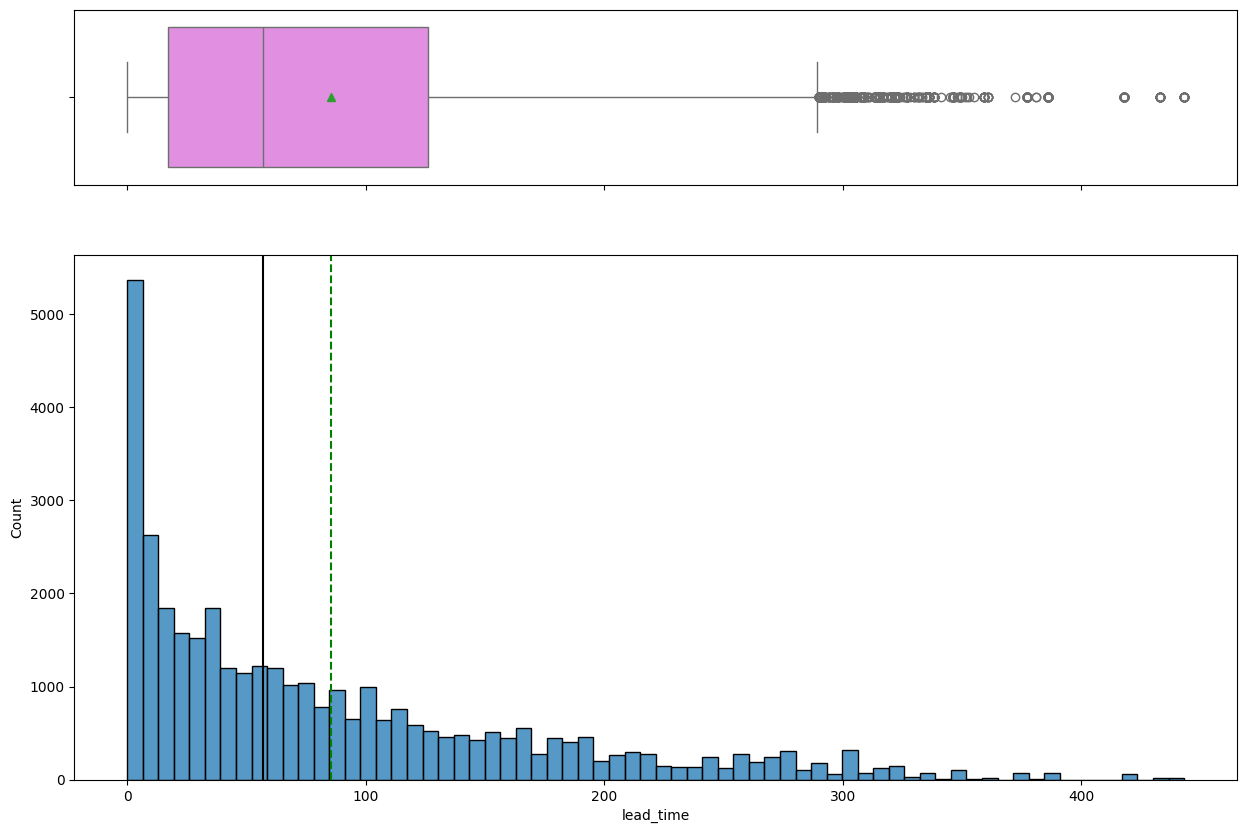

In [ ]:
histogram_boxplot(data, "lead_time")

##### Observation on avg_price_per_room

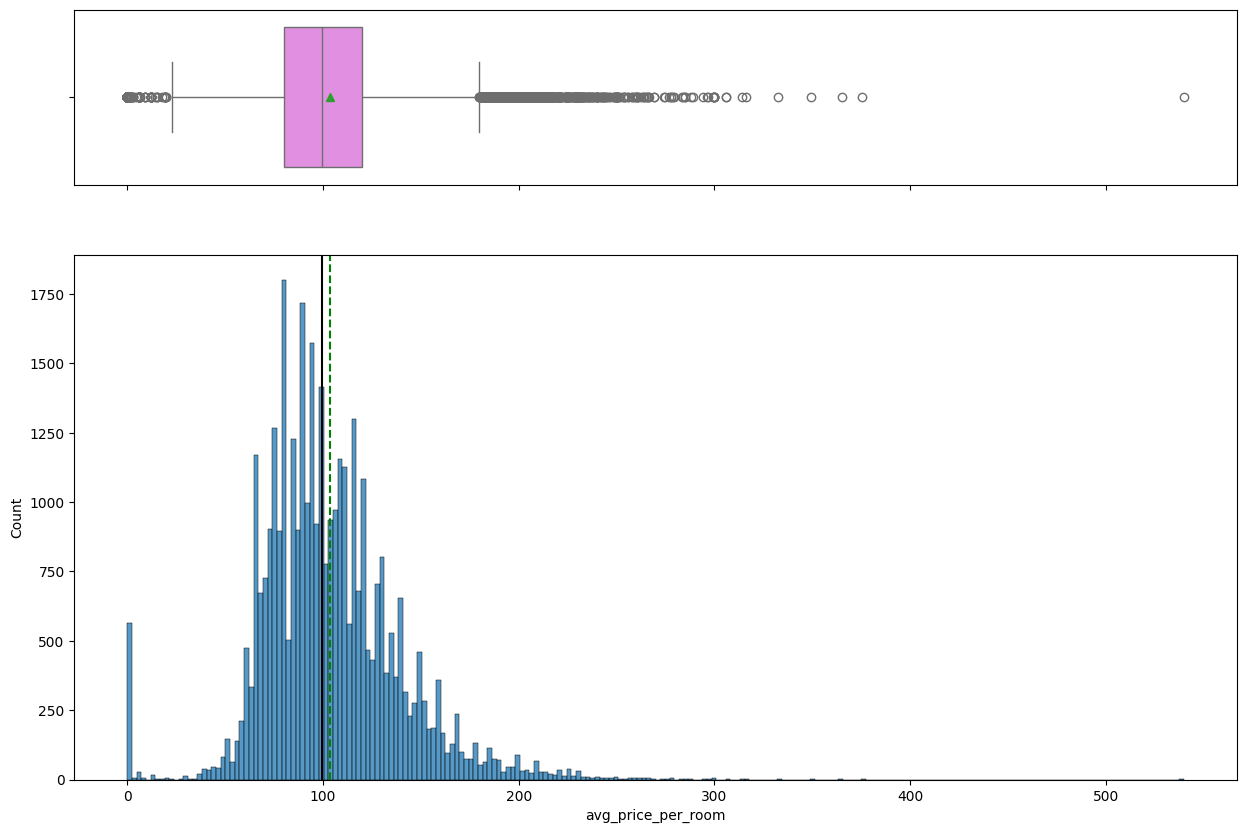

In [ ]:
histogram_boxplot(data, "avg_price_per_room")

In [ ]:
# how many free rooms does the hotel give away?
data.loc[data['avg_price_per_room']==0].shape

(545, 18)

##### Observation on no_of_previous_cancellations

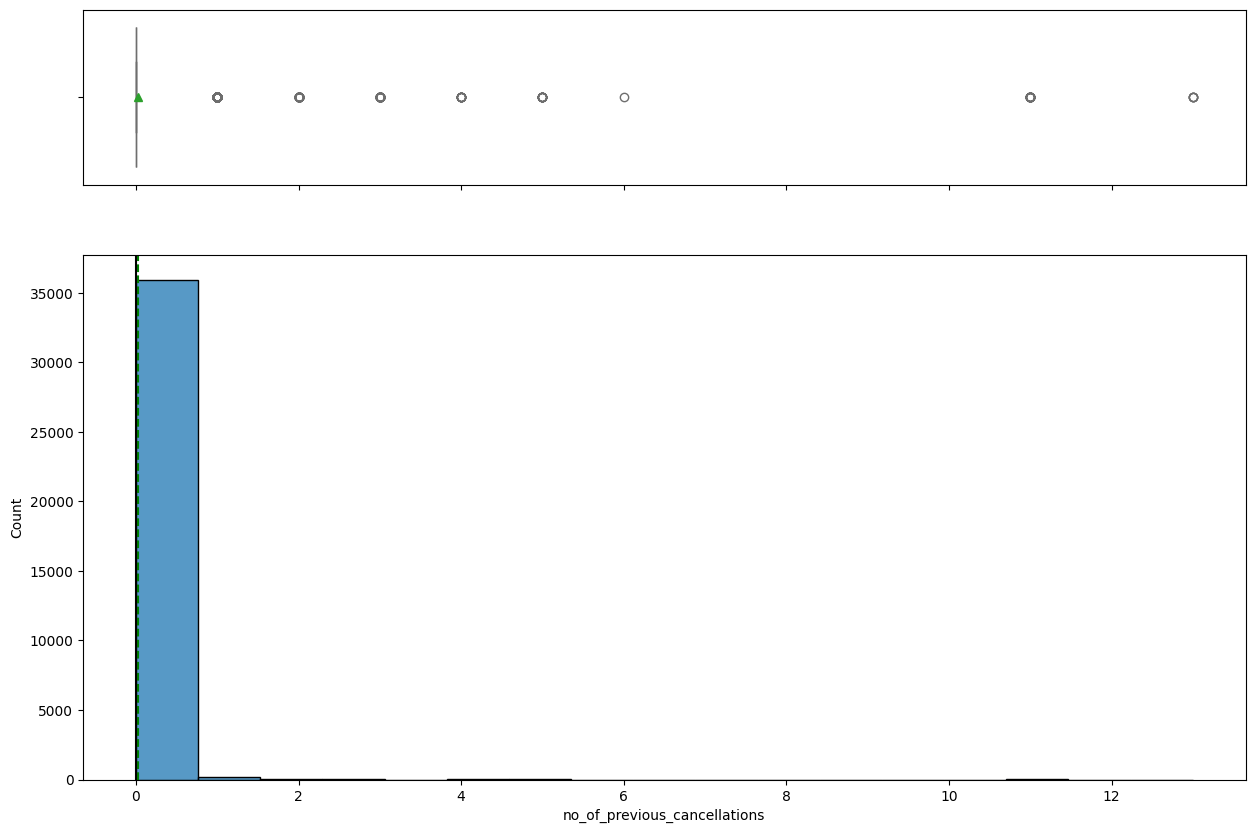

In [ ]:
histogram_boxplot(data, "no_of_previous_cancellations")

In [ ]:
print(data['no_of_previous_cancellations'].value_counts())

no_of_previous_cancellations
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64


##### Observation on no_of_previous_bookings_not_canceled

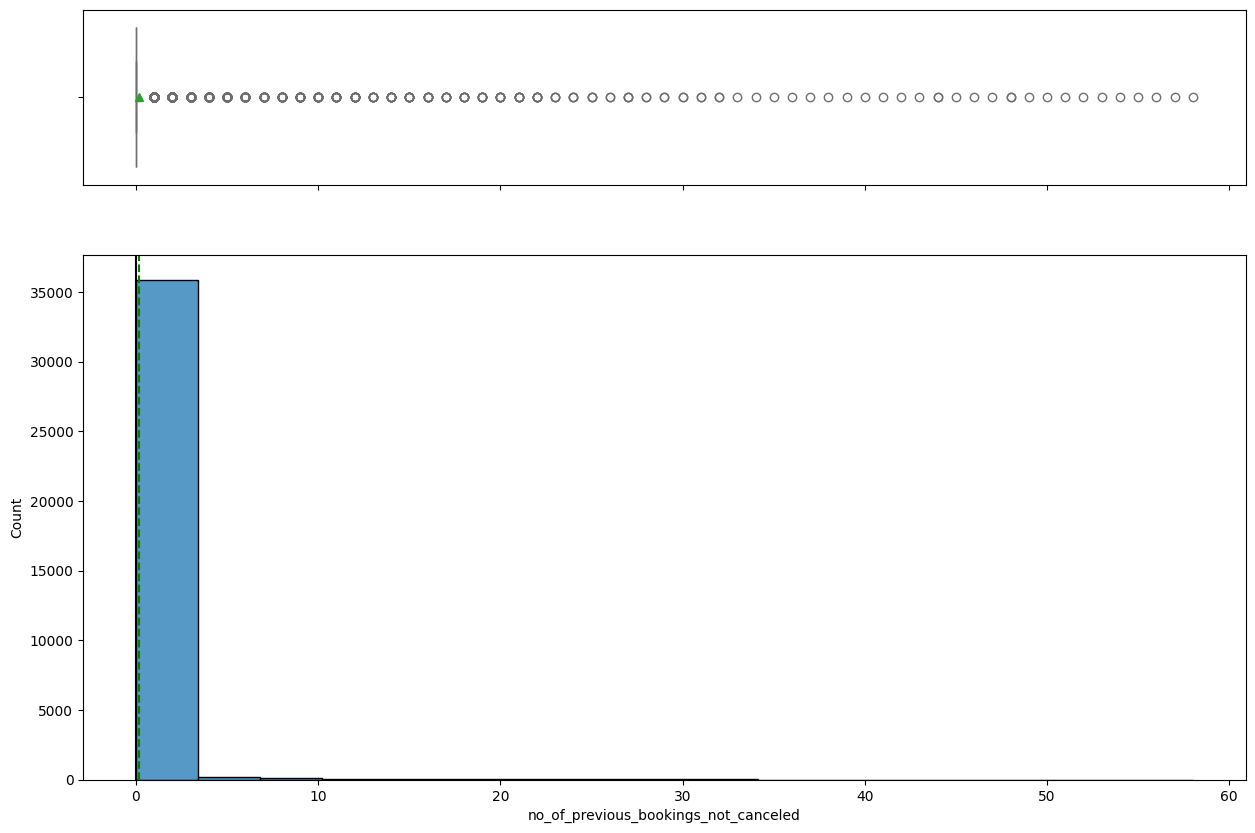

In [ ]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

#### Categorical variable

In [ ]:
# Making a list of all categorical variables
cat_cols =  ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status', 'required_car_parking_space', 'repeated_guest']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
--------------------------------------------------
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
--------------------------------------------------
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
--------------------------------------------------
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
--------------------------------------------------
required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64
--------------------------------------------------
repeated_guest
0    35345
1      930
Name: count, dtype: int64
-------------------------------------

##### Observation on type_of_meal_plan

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


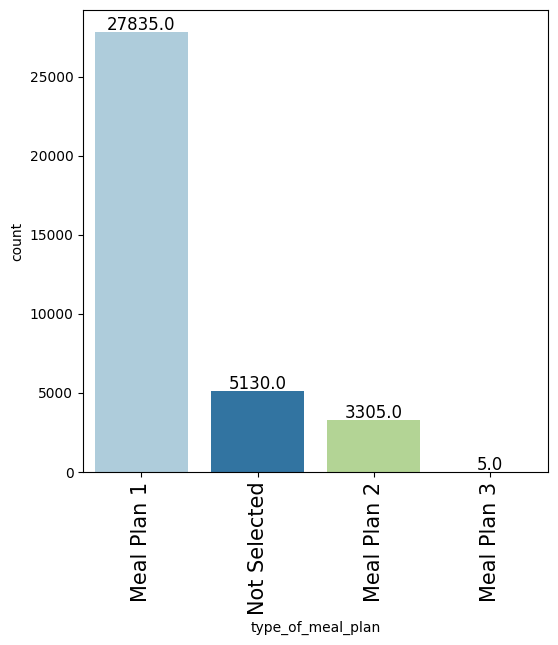

In [ ]:
labeled_barplot(data, "type_of_meal_plan")

##### Observation on room_type_reserved

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


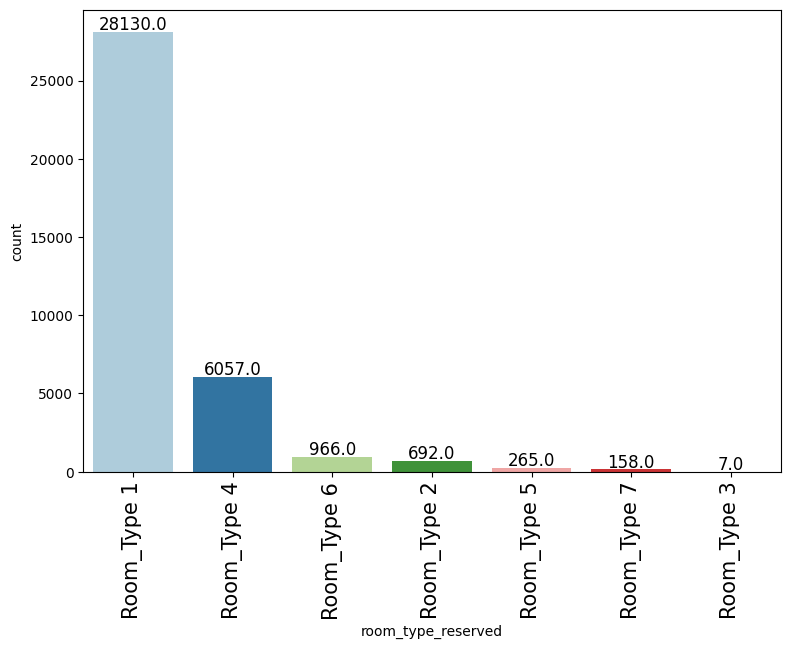

In [ ]:
labeled_barplot(data, "room_type_reserved")

##### Observation on market_segment_type

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


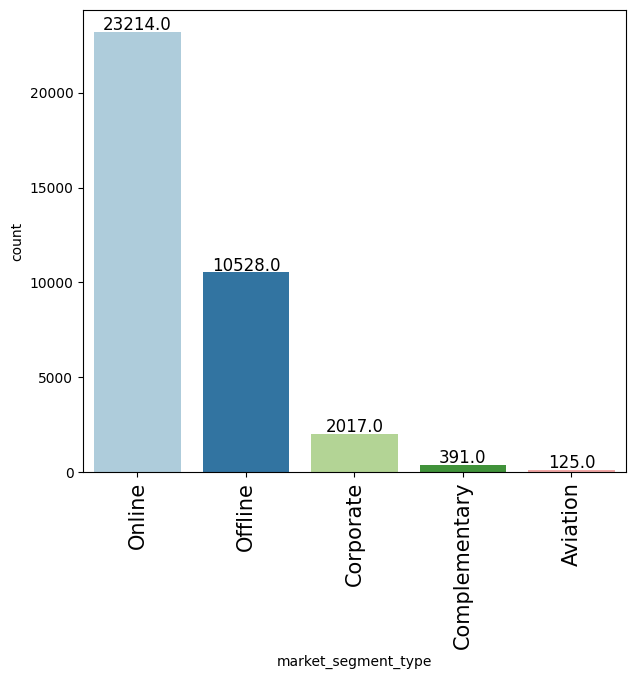

In [ ]:
labeled_barplot(data, "market_segment_type")

##### Observation on booking_status

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


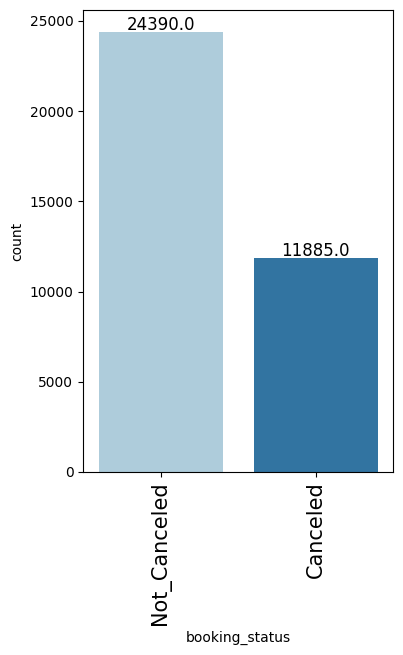

In [ ]:
labeled_barplot(data, "booking_status")

##### Observation on required_car_parking_space

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


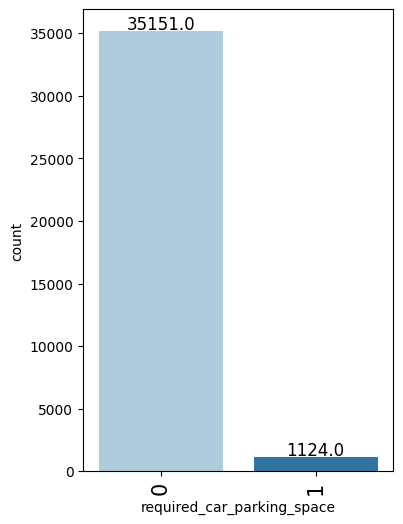

In [ ]:
labeled_barplot(data, "required_car_parking_space")

##### Observation on repeated_guest

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


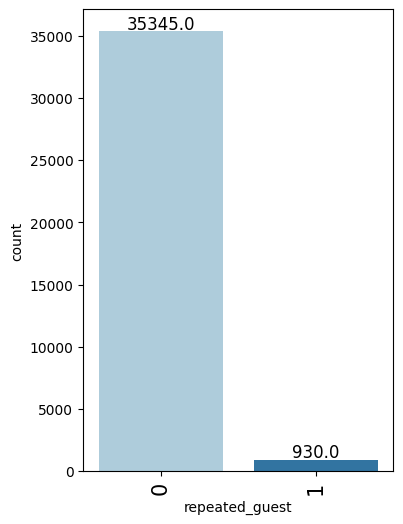

In [ ]:
labeled_barplot(data, "repeated_guest")

##### Observation on arrival_year

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


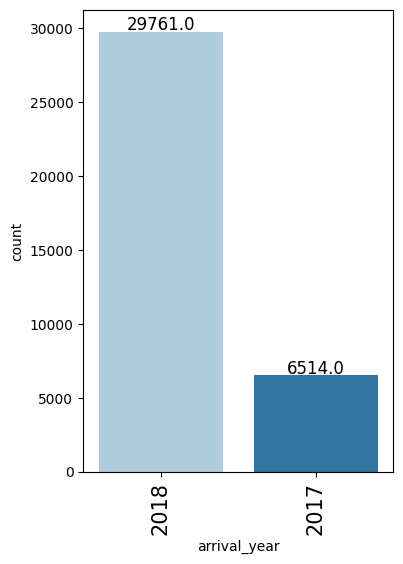

In [ ]:
labeled_barplot(data, "arrival_year")

##### Observation on arrival_month

In [ ]:
labeled_barplot(data, "arrival_month")

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


##### Observation on arrival_date

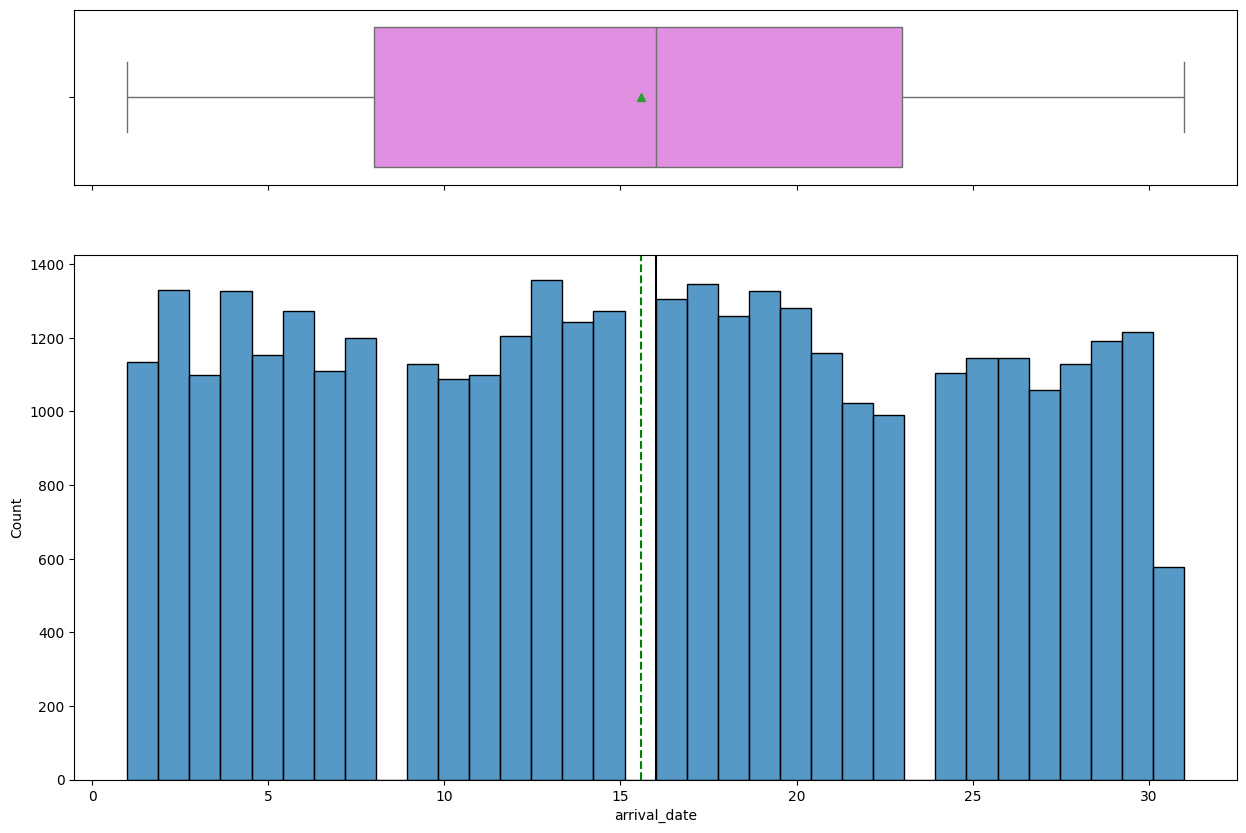

In [ ]:
histogram_boxplot(data, "arrival_date")

In [ ]:
labeled_barplot(data, "arrival_date")

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


##### Observation on no_of_adults

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


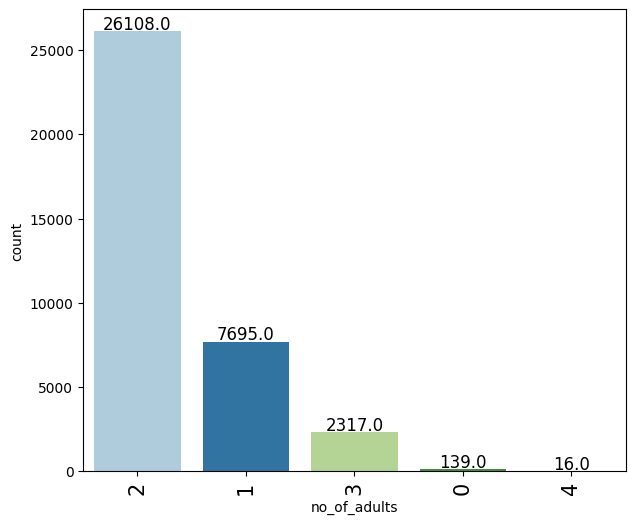

In [ ]:
labeled_barplot(data, "no_of_adults")

##### Observation on no_of_children

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


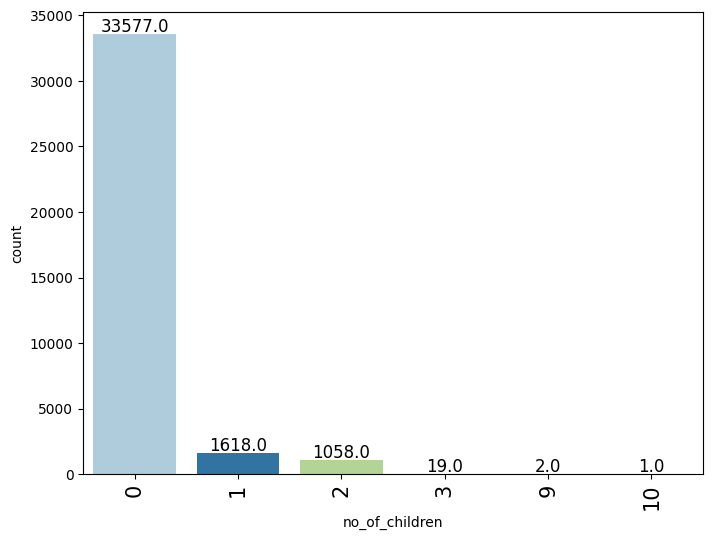

In [ ]:
labeled_barplot(data, "no_of_children")

##### Observation on no_of_special_requests

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


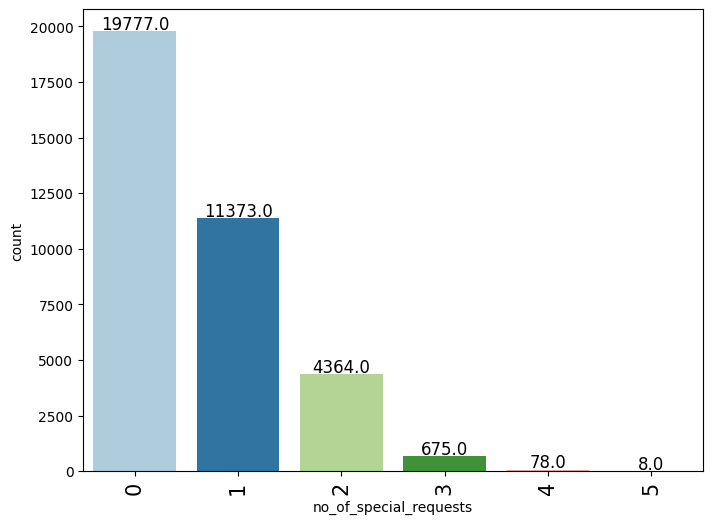

In [ ]:
labeled_barplot(data, "no_of_special_requests")

##### Observation on no_of_weekend_nights

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


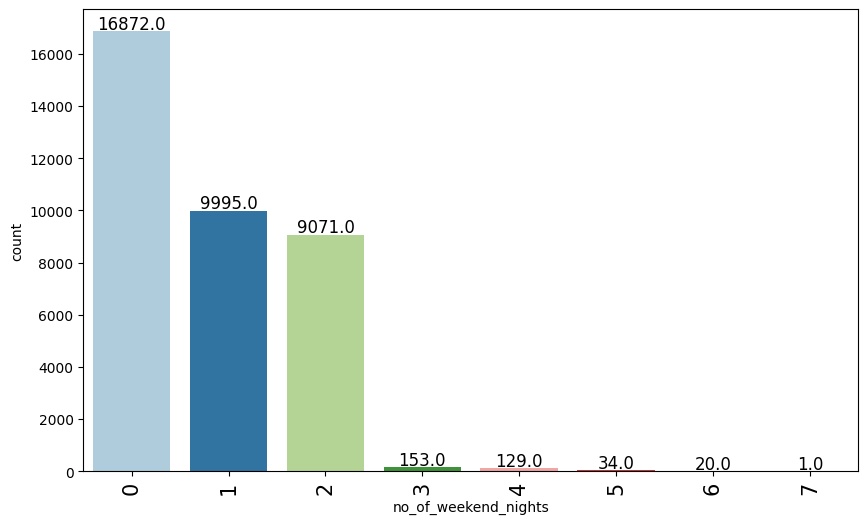

In [ ]:
labeled_barplot(data, "no_of_weekend_nights")

##### Observation on no_of_week_nights

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


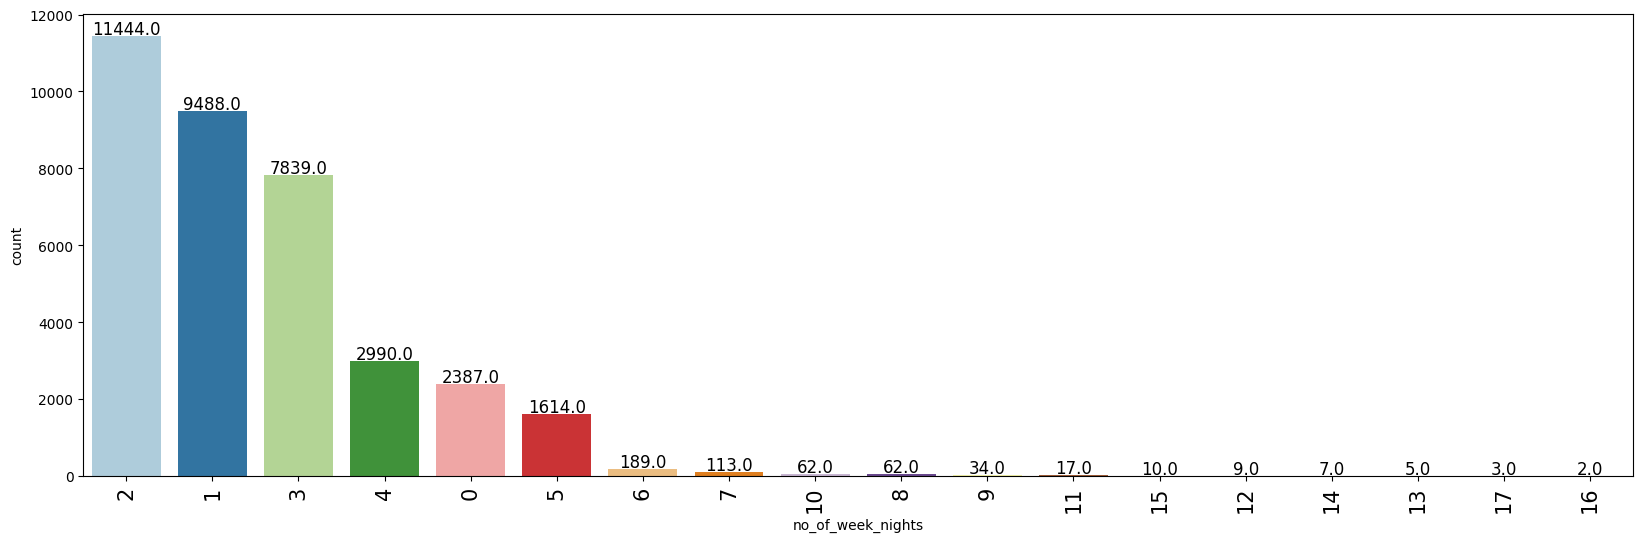

In [ ]:
labeled_barplot(data, "no_of_week_nights")

### Bivariate Analysis

Different types of Bivariate Analysis that can be done:
- Bivariate Analysis of two Numerical Variables.
- Bivariate Analysis of two Categorical Variables.
- Bivariate Analysis of one Numerical Variable and one Categorical Variable.

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation by Heatmap

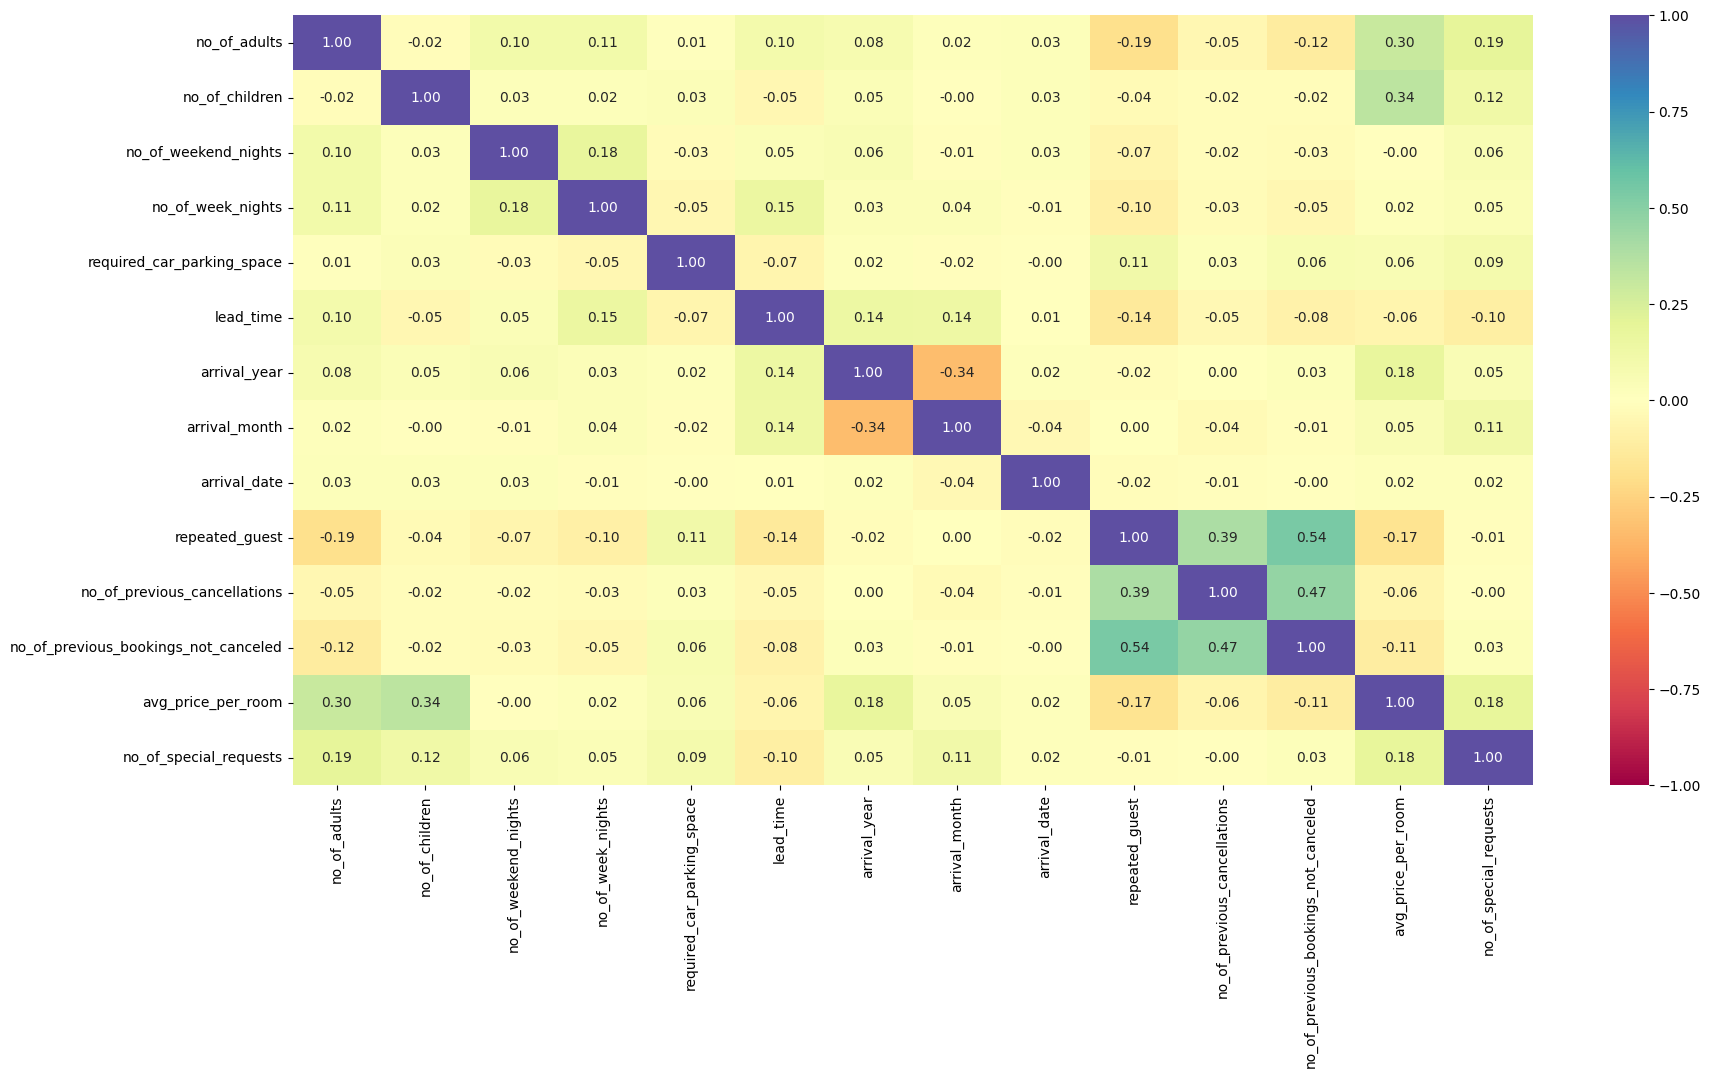

In [ ]:
# Check for correlation among numerical variables
num_var = data.select_dtypes(include=np.number).columns.tolist()

corr = data[num_var].corr()

# plot the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

No numerical variables are correlated with each other except repeated guests and number of previous bookings not cancelled.

#### Observation on avg_price_per_room Vs arrival_month  


<ipython-input-41-e7a0f150ec87>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=data,x='arrival_month',y='avg_price_per_room',ci=False)


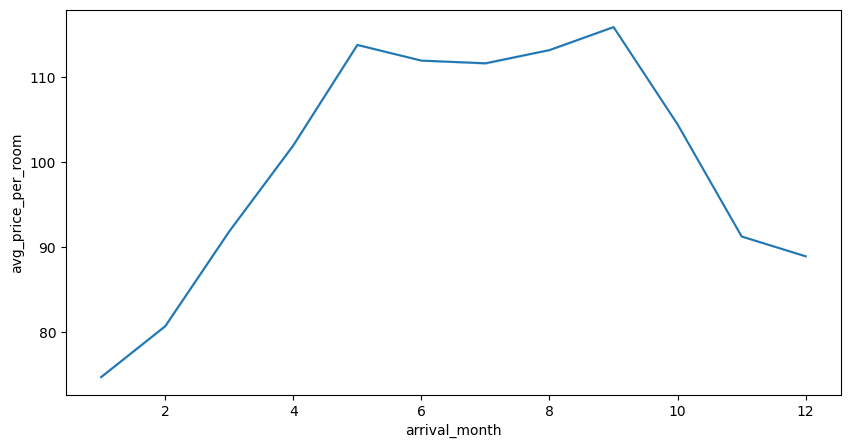

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='arrival_month',y='avg_price_per_room',ci=False)
plt.show()

- Prices are higher between may and october.
- The prices are the highest in the summer, since most people go on vacation then it peaks at around October.

#### Observation on avg_price_per_room Vs no_of_special_requests

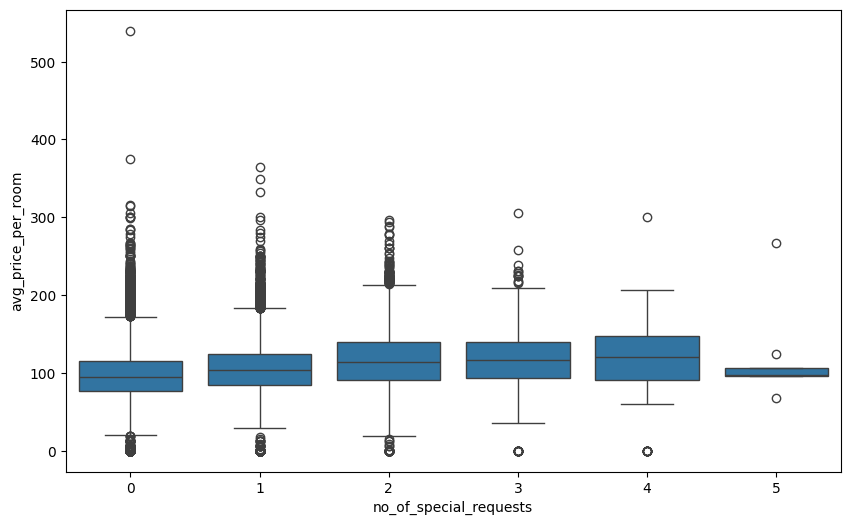

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='no_of_special_requests',y='avg_price_per_room')
plt.show()

The price of the room does not seem to vary too much if there is little requests given, but when there is about 4 or more special requests the price seems to suffer variation.

#### Observation on avg_price_per_room Vs required_car_parking_space

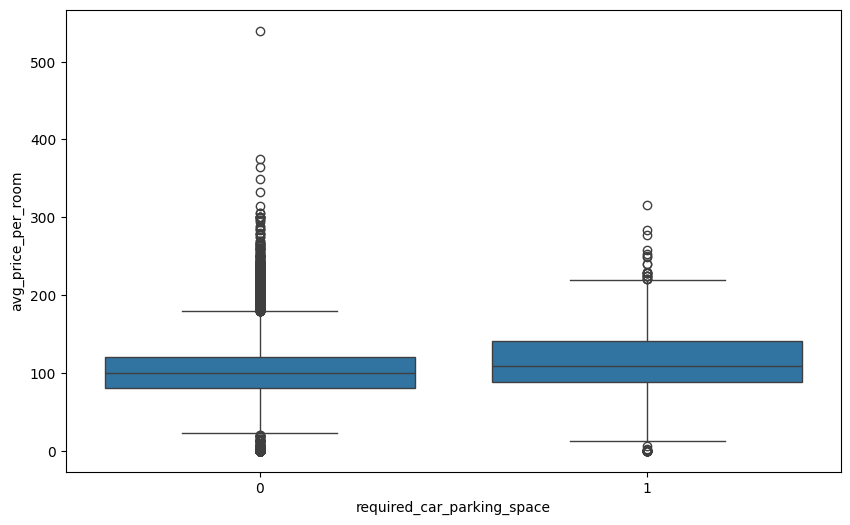

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='required_car_parking_space',y='avg_price_per_room')
plt.show()

#### Observation on booking_status Vs market_segment_type

<Axes: xlabel='market_segment_type', ylabel='count'>

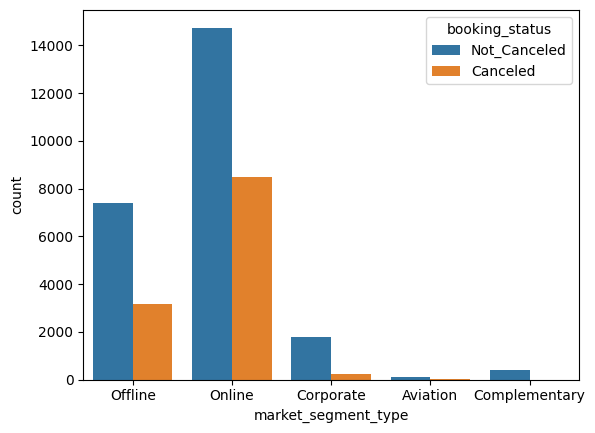

In [ ]:
sns.countplot(x='market_segment_type',hue='booking_status', data=data)

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


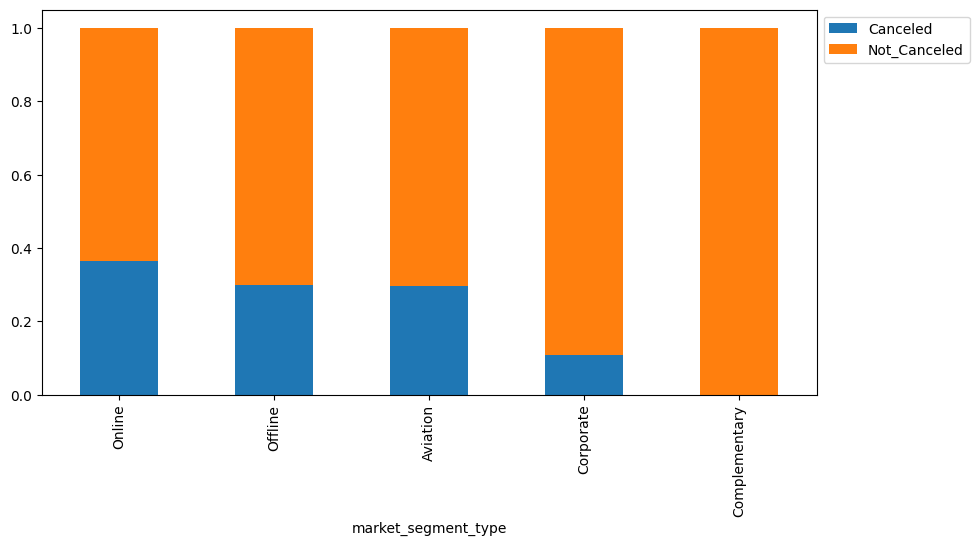

In [ ]:
stacked_barplot(data,'market_segment_type','booking_status')

- Most of the cancellations when customers book the hotel online.
- Most of the non-cancellations also happen when customers book the hotel online.
- Almost no cancellations happen when it is complementary.

#### Observation on booking_status Vs avg_price_per_room

<ipython-input-39-977df6c7d195>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-39-977df6c7d195>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


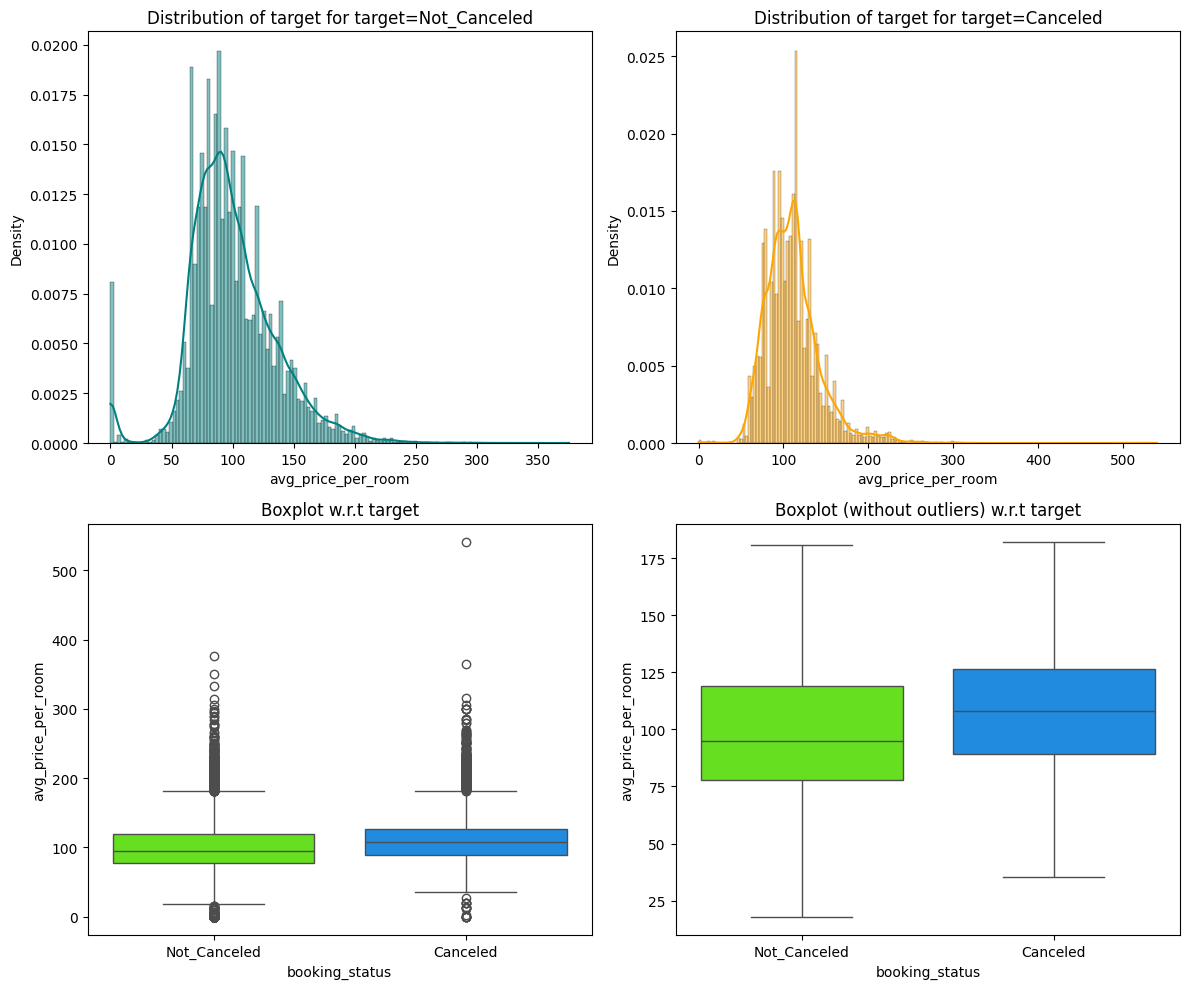

In [ ]:
distribution_plot_wrt_target(data, 'avg_price_per_room', 'booking_status')

#### Observation on booking_status Vs lead_time

<ipython-input-39-977df6c7d195>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-39-977df6c7d195>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


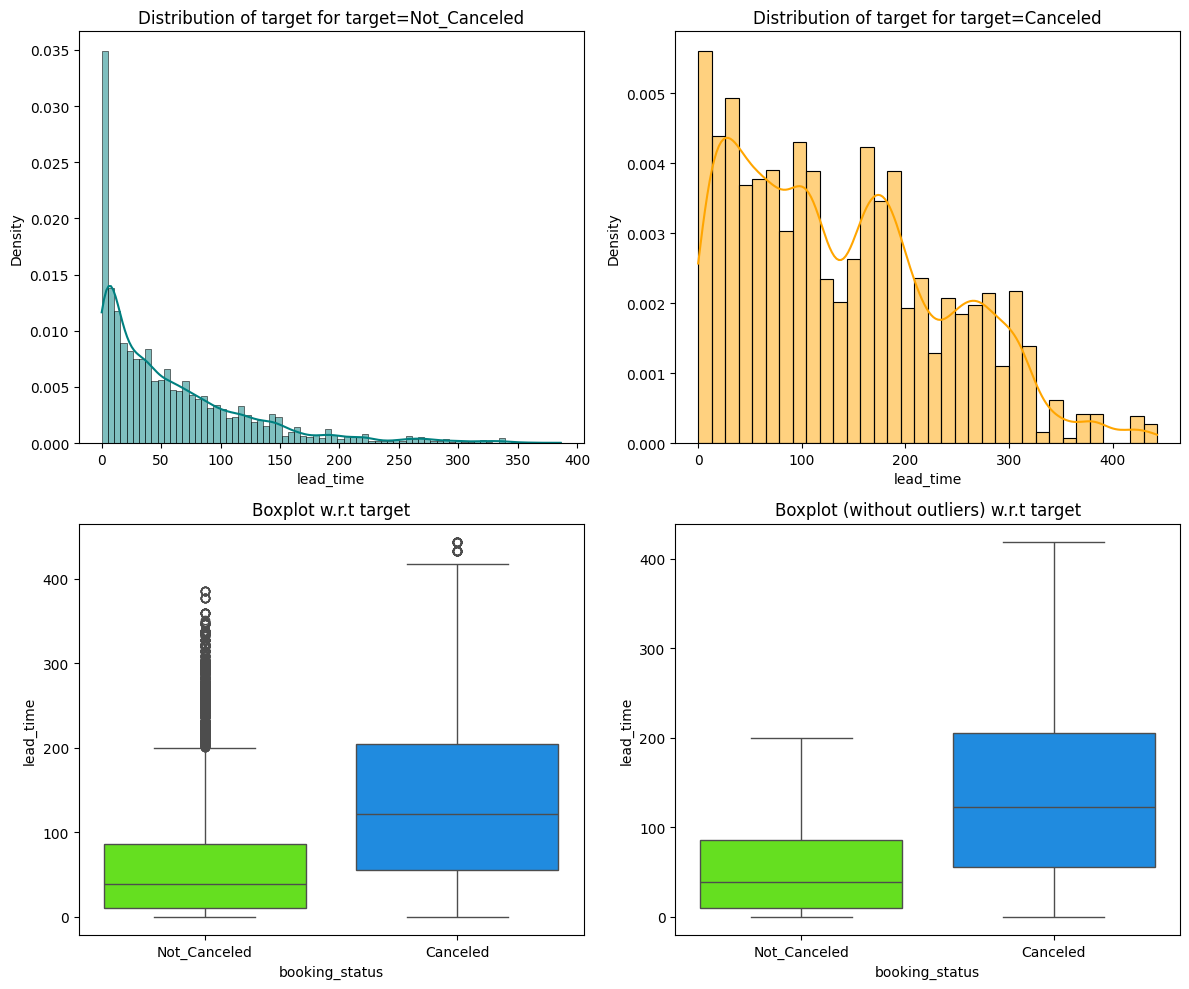

In [ ]:
distribution_plot_wrt_target(data, 'lead_time', 'booking_status')

Customers with long lead time cancelled more than with less lead time.

#### Observation on booking_status Vs Family members

Let's check how many people were travelling with their family (spouse and children).

In [ ]:
family_data = data[(data['no_of_adults']>1)]
family_data.shape

(28441, 18)

Generally people travel with their spouse or children or both for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.

In [ ]:
family_data['no_of_family_members'] = (family_data['no_of_children'] + family_data['no_of_adults'])

<ipython-input-49-6e0b3c6a9235>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_data['no_of_family_members'] = (family_data['no_of_children'] + family_data['no_of_adults'])


<Axes: xlabel='no_of_family_members', ylabel='count'>

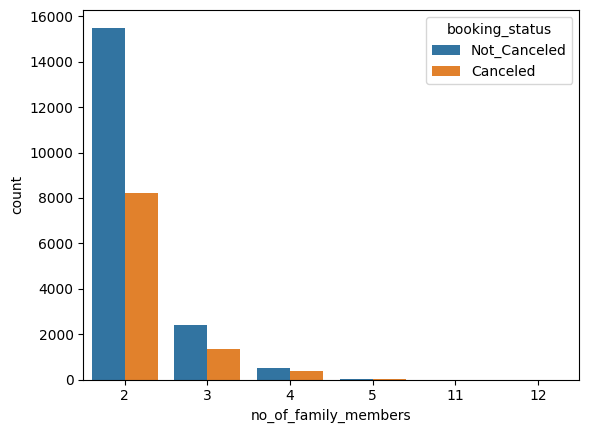

In [ ]:
sns.countplot(x='no_of_family_members',hue='booking_status', data=family_data)

booking_status        Canceled  Not_Canceled    All
no_of_family_members                               
All                       9985         18456  28441
2                         8213         15506  23719
3                         1368          2425   3793
4                          398           514    912
5                            5            10     15
11                           1             0      1
12                           0             1      1
------------------------------------------------------------------------------------------------------------------------


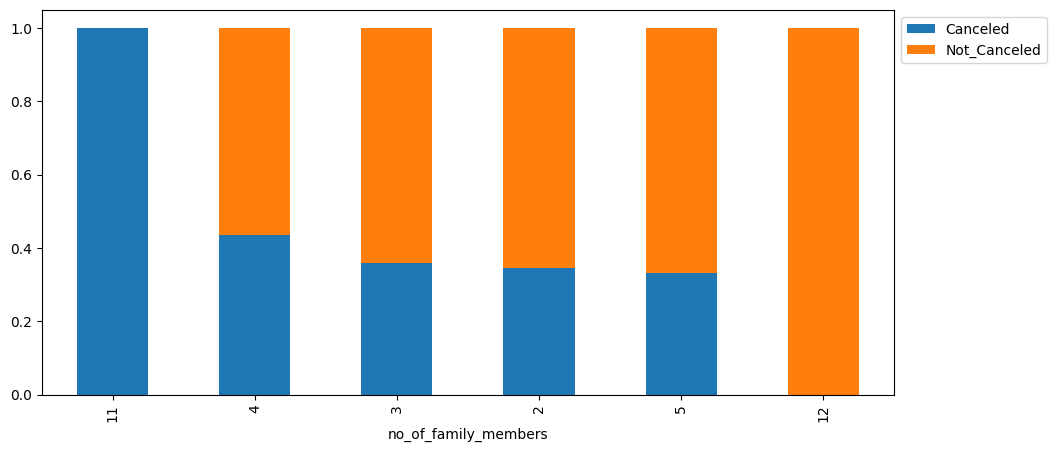

In [ ]:
stacked_barplot(family_data,'no_of_family_members','booking_status')

There is equally likelihood of cancellation regardless of how many children they have

#### Observation on booking_status Vs total days

In [ ]:
day_data = data[(data['no_of_week_nights']>0) & (data['no_of_weekend_nights']>0)]
day_data['total_days'] = (day_data['no_of_week_nights'] + day_data['no_of_weekend_nights'])

<ipython-input-52-b68469825d7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data['total_days'] = (day_data['no_of_week_nights'] + day_data['no_of_weekend_nights'])


In [ ]:
sns.countplot(x='total_days',hue='booking_status', data=day_data)

<Axes: xlabel='total_days', ylabel='count'>

booking_status  Canceled  Not_Canceled    All
total_days                                   
All                 6115         10979  17094
3                   2183          3689   5872
4                   1387          2977   4364
5                    738          1593   2331
2                    639          1301   1940
6                    465           566   1031
7                    383           590    973
8                     79           100    179
10                    58            51    109
9                     53            58    111
14                    27             5     32
15                    26             5     31
13                    15             3     18
12                    15             9     24
11                    15            24     39
20                     8             3     11
19                     5             1      6
16                     5             1      6
17                     4             1      5
18                     3          

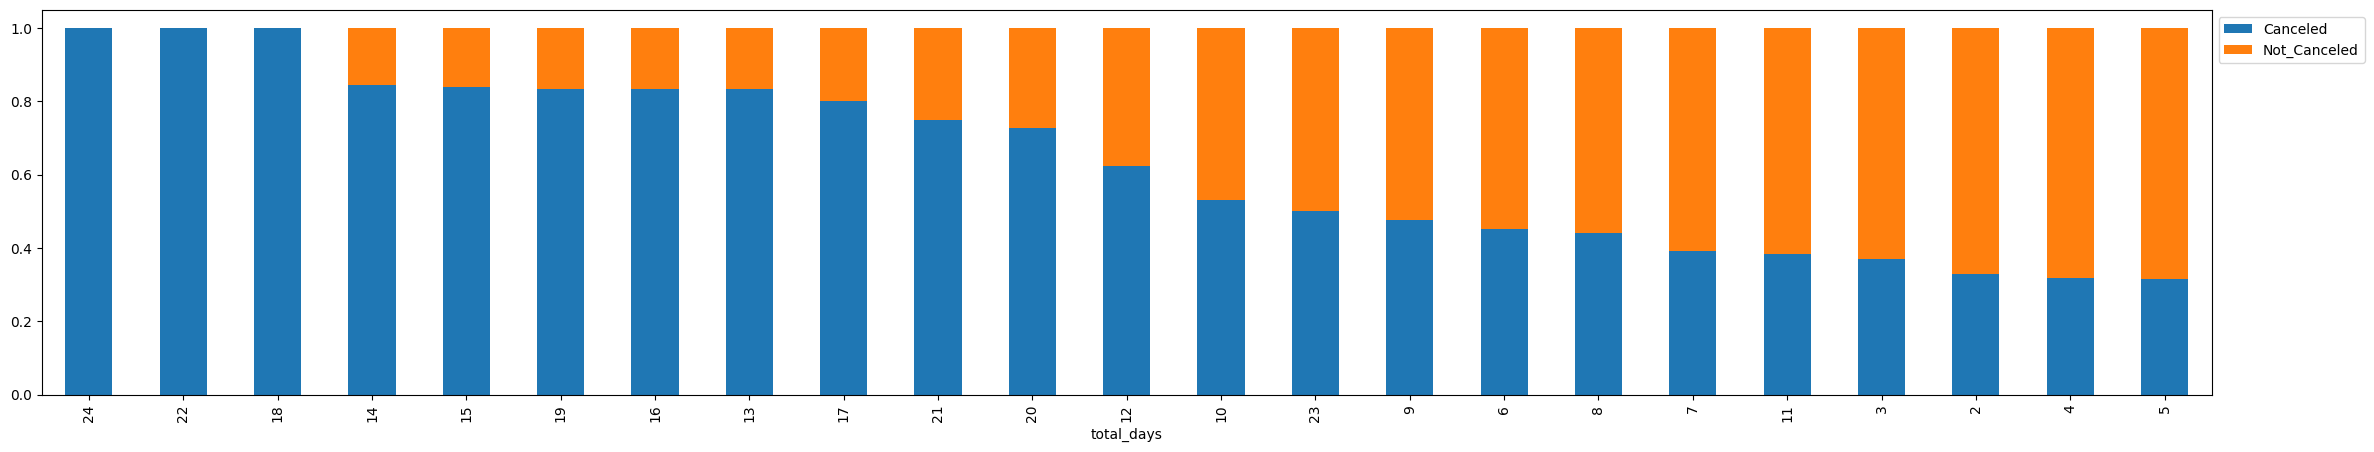

In [ ]:
stacked_barplot(day_data,'total_days','booking_status')

The more days a person stays, the less likely of cancellation

#### Observation on booking_status Vs arrival_month


booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


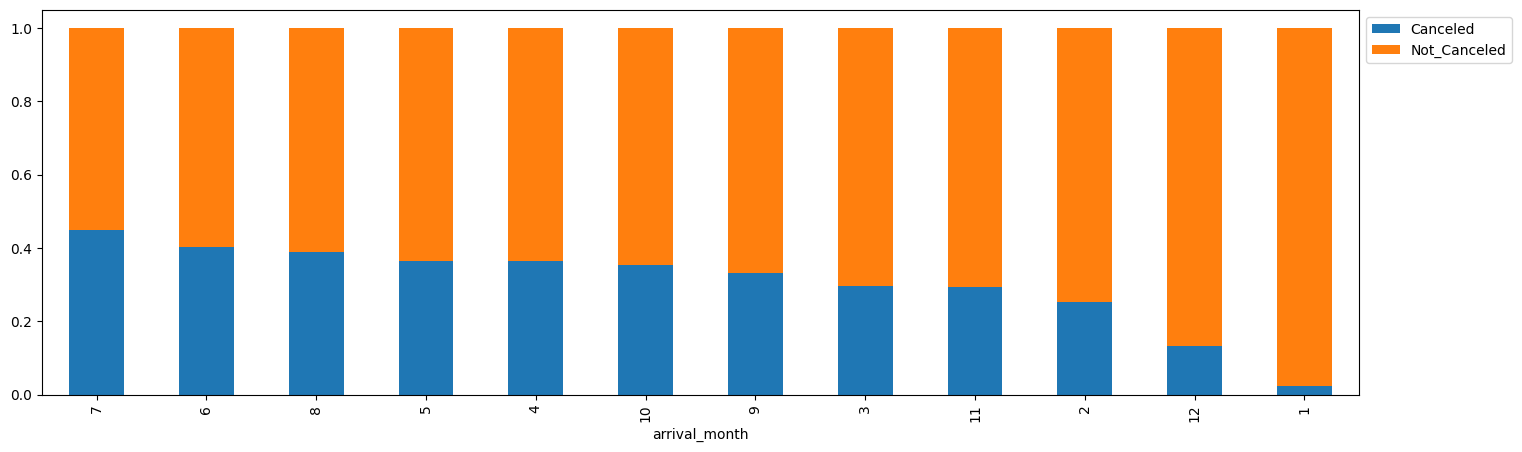

In [ ]:
stacked_barplot(data,'arrival_month','booking_status')

From the percentage of bookings cancelled each month it is clear that there is a more likelihood of cancellation in the 7th month and least cancellation is in the 1st month which is January.

### Multivariate Analysis

#### Observation on booking status Vs average price per room Vs number of adults

In [ ]:
sns.catplot(data=data,x='no_of_adults',y='avg_price_per_room',hue ='booking_status',kind = 'box')

#### Observation on booking status Vs lead time Vs number of adults

In [ ]:
sns.catplot(data=data,x='no_of_adults',y='lead_time',hue ='booking_status',kind = 'box')

### Key questions

#### 1.What are the busiest months in the hotel?

In [ ]:
labeled_barplot(data, "arrival_month")

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


- October is the busiest month in the hotel.
- September is the second busiest month.
- After december the amount of bookings decrease.
- Number of bookings in january is the least amoung all months in the hotel.

#### 2.Which market segment do most of the guests come from?

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


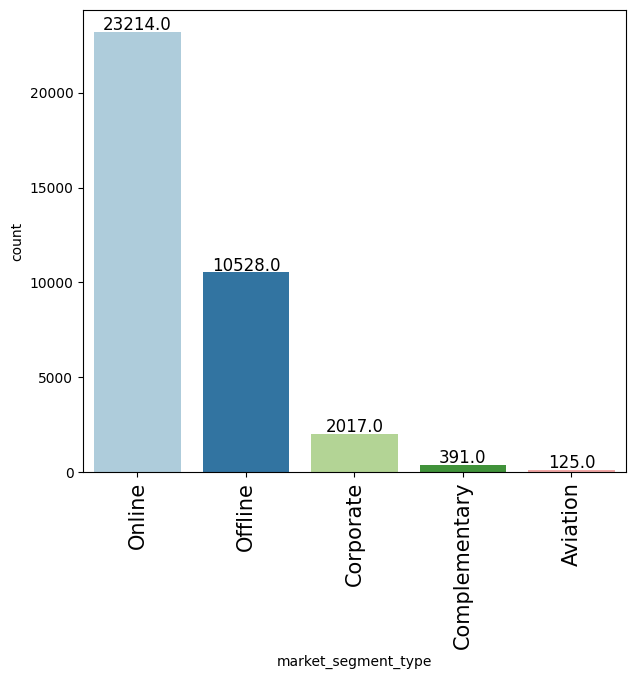

In [ ]:
labeled_barplot(data, "market_segment_type")

- Most of the guests come from online and then from offline.
- Least number of guests come from aviation.

#### 3.Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

<ipython-input-60-103183036cde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x='market_segment_type',y='avg_price_per_room',palette='gist_rainbow')


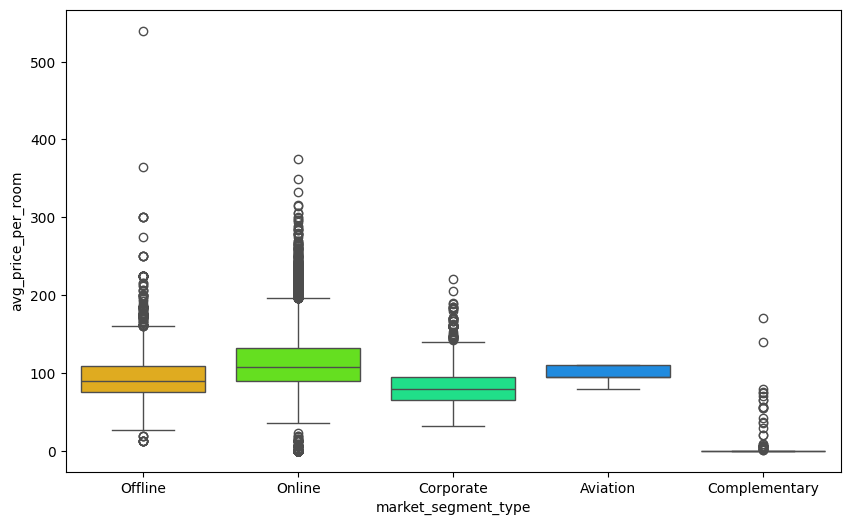

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='market_segment_type',y='avg_price_per_room',palette='gist_rainbow')
plt.show()

- As hotel prices are very demand heavy as mentioned.
- Online seems to have the highest median price, since online is where the most booking takes place.
- Complementary seems to have the lowest median price, since it is where the less booking takes place.

#### 4.What percentage of bookings are cancelled?

<ipython-input-15-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


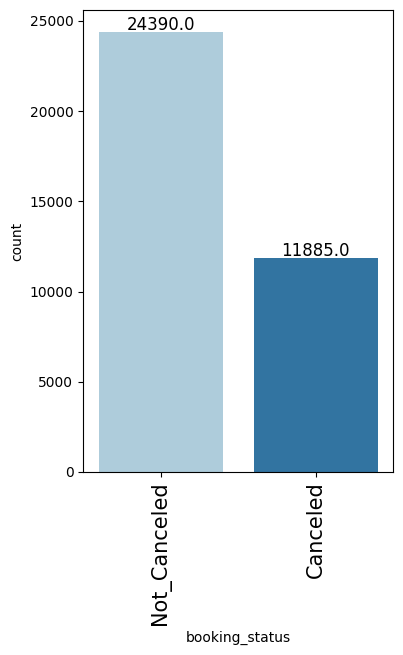

In [ ]:
labeled_barplot(data, "booking_status")

- Out of 36275 guests booked, 11885 guests have cancelled their bookings which is 32.8%.
- Out of 36275 guests booked, 24390 guests have not cancelled their bookings and stayed in the hotel which is 67.2%

#### 5.Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


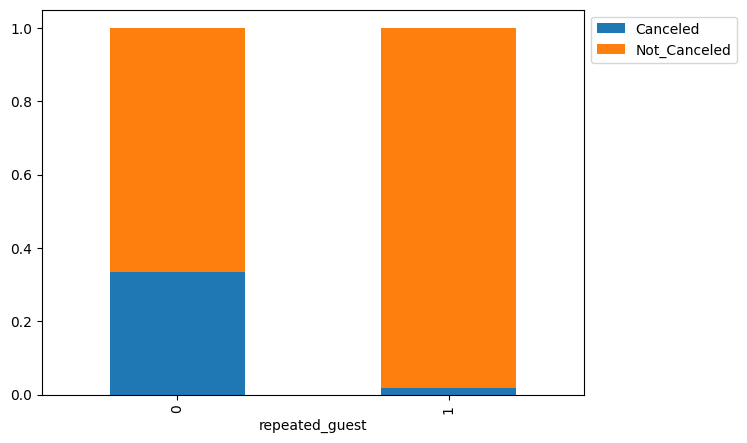

In [ ]:
stacked_barplot(data,'repeated_guest','booking_status')

This proves that most repeated guests have not cancelled their booking status, in which may indicate that there is a source of brand loyalty when it comes to repeated guests.

#### 6.Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

<Axes: xlabel='no_of_special_requests', ylabel='count'>

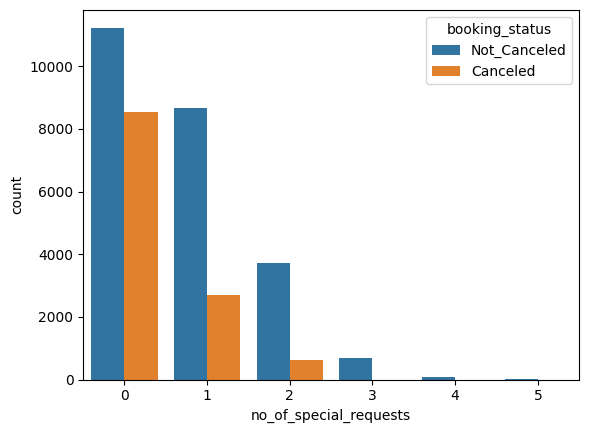

In [ ]:
sns.countplot(x='no_of_special_requests',hue='booking_status', data=data)

In [ ]:
stacked_barplot(data,'no_of_special_requests','booking_status')

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


- When there are no special requests, we can observe that there are more cancellations.
- When there are more special requests, there is less likelihood of cancellation.

### Insight from EDA

- In order to reduce the likelihood of cancellation, we can create a marketing campaign that allows a raffle for free room.
- Generally, a customer may have special requests, in which employment satisfaction and customer service will increase since the employee will do its best to find a room that satisfies these requests.
- We have to keep the prices low in months of high demand to attract more people and to reduce the likelihood of cancellation.
- We can create brand loyalty  among repeating customers such as reward cards and complementary breakfasts in order to maintain it.
- We suggest creating a kid's room as an attraction tool in order to decrease the likelihood of cancellation due to parents having a lot of children and being able to accommodate  them will reduce the pain of staying at a hotel.

## Data Preprocessing

### Missing Value Treatment

In [ ]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There is no missing values in the data set.

### Feature Engineering

In [ ]:
#Change Not Cancelled booking to 0 and Cancelled booking as 1 for the analysis
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

In [ ]:
data['booking_status'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 36275 entries, 0 to 36274
Series name: booking_status
Non-Null Count  Dtype
--------------  -----
36275 non-null  int64
dtypes: int64(1)
memory usage: 283.5 KB


### Outlier detection

In [ ]:
#Outlier detection using boxplot
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

#Dropping booking status
numerical_cols.remove('booking_status')

plt.figure(figsize=(15,10))

for i, variable in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    plt.boxplot(data[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


- All numerical columns have outliers
- However, we will not treat them as they are proper values.

In [ ]:
data.loc[data['no_of_children'] > 4]

Empty DataFrame
Columns: [no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []

In [ ]:
data['no_of_children'] = data['no_of_children'].replace([9,10], 3)

Only three rows have no of children greater than 3(no of children as 9, 10). So we replace these values to 3.

### Data Preparation for Modelling

In [ ]:
#Independent and dependent variables being defined
x = data.drop(['booking_status'],axis=1)
y = data['booking_status']

#Adding constant
X = sm.add_constant(x)
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)

In [ ]:
# converting the input attributes into float type for modelling
X = X.astype(float)

In [ ]:
#Create a train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


## Logistic Regression Model

### Model Building

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [ ]:
#Fitting the logistic regression model
logit = sm.Logit(y_train,X_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 18 Aug 2024   Pseudo R-squ.:                  0.3293
Time:                        14:21:37   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -923.2807    120.833     -7.641      0.000   -1160.110    -686.452
no_of_adults                             0.1136      

- Since some of the coefficients are negative and some are positive.
- Negative values of the coefficient indicate that the probability of the person cancelling their hotel reservation is decreasing with that variable increasing.
- Positives values of the coefficient indicate that the probability of a person cancelling their hotel reservation increases with that variable increasing.
- There are also some high p-values that should be addressed in this model.

#### Model Performance Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a booking will not cancel but in reality, the booking will cancel (FN)
- Predicting a booking will cancel but in reality, the booking will not cancel (FP)

**Which case is more important?**

- If we predict that a booking will not cancel but in reality, the booking cancels, then the company will have to face the loss and the hotel cannot resell the room.
- If we predict that a booking will cancel but in reality, the booking does not cancel, then the company will have to bear the cost of guests paid or provide compensation for the visitors.

**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * f1_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
#Training Performance
print('Training Performance')
model_performance_classification_statsmodels(lg,X_train,y_train)

Training Performance


Accuracy  Recall  Precision      F1
0   0.80604 0.63422    0.73975 0.68293

**Observations**

- The f1_score of the model is ~0.68 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

#### Detecting and Dealing with Multicollinearity

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [ ]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39474810.78615
no_of_adults                                  1.35079
no_of_children                                2.09311
no_of_weekend_nights                          1.06947
no_of_week_nights                             1.09571
required_car_parking_space                    1.03992
lead_time                                     1.39491
arrival_year                                  1.43107
arrival_month                                 1.27563
arrival_date                                  1.00680
repeated_guest                                1.78348
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05473
no_of_special_requests                        1.24796
type_of_meal_plan_Meal Plan 2                 1.27188
type_of_meal_plan_Meal Plan 3                 1.02526
type_of_meal_plan_Not Selected                1

There is no issue with multicollinearity with the main referenced variables, and the dummy variables which are from a single dataset that had 4 different categories, in which being the market segment, is a case scenario which can be exempt when checking for multicollinearity

#### Removing high p-value variables

* For attributes present in the data, the p-values are high for some variables and we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
#Initial list of columns
cols = X_train.columns.tolist()

#Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    #Defining the train set
    x_train_aux = X_train[cols]

    #Fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    #Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    #Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

New Logit Model

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 18 Aug 2024   Pseudo R-squ.:                  0.3283
Time:                        14:21:42   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -916.0557    120.472     -7.604      0.000   -1152.176    -679.935
no_of_adults                       0.1087      0.037      2.911      0.

Now no categorical feature has p-value greater than 0.05, so we'll consider the features in X_train1 as the final ones and lg1 as final model.

#### Coefficient Interpretations

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [ ]:
#Converting coefficients to odds
odds = np.exp(lg1.params)

#Finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

#Removing limit from number of columns to display
pd.set_option("display.max_columns", None)

#Adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns)

Odds  Change_odd%
const                          0.00000   -100.00000
no_of_adults                   1.11480     11.47969
no_of_children                 1.16576     16.57635
no_of_weekend_nights           1.11479     11.47875
no_of_week_nights              1.04262      4.26206
required_car_parking_space     0.20303    -79.69675
lead_time                      1.01583      1.58341
arrival_year                   1.57228     57.22767
arrival_month                  0.95850     -4.14986
repeated_guest                 0.06474    -93.52598
no_of_previous_cancellations   1.25723     25.72288
avg_price_per_room             1.01934      1.93423
no_of_special_requests         0.22997    -77.00299
type_of_meal_plan_Meal Plan 2  1.17983     17.98312
type_of_meal_plan_Not Selected 1.33096     33.09559
room_type_reserved_Room_Type 2 0.70080    -29.92003
room_type_reserved_Room_Type 4 0.75421    -24.57872
room_type_reserved_Room_Type 5 0.47931    -52.06881
room_type_reserved_Room_Type 6 0.38040    -61.96015
room_type_reserved_Room_Type 7 0.23889    -76.11050
market_segment_type_Corporate  0.45323    -54.67705
market_segment_type_Offline    0.16752    -83.24783

**Coefficient interpretations**

- Number of adults increases the odds of cancelling your booking by 11.5%
- Number of children increases the odds of cancelling your booking by 17%
- Number of weekend nights increases your odds of cancelling by 11.5%
- Number of week nights spent increases your odds of cancelling by 4.3%
- Required parking space decreases the likelihood of cancelling by 80%
- Lead time increases the likelihood of cancelling by 1.6%
- Arrival month decreases the likelihood of cancelling the reservation by 4.2%
- The number of previous cancellations is likely to increase the risk of cancellation by 26%
- The price of the hotel room is to increase the odds of cancellation by 2%
- The number of special requests is likely to decrease the likelihood of cancellation by 77%

#### Checking performance of the new model

**Training set performance**

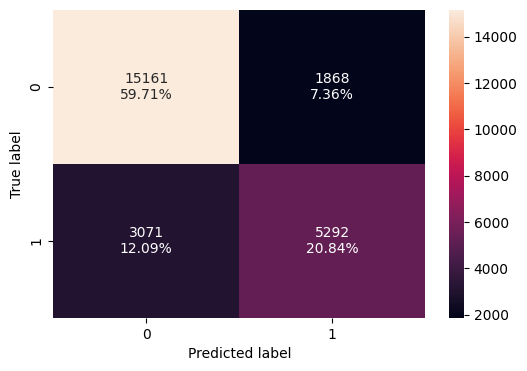

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1,X_train1,y_train)

print('Training Performance')
log_reg_model_train_perf

Training Performance


Accuracy  Recall  Precision      F1
0   0.80549 0.63279    0.73911 0.68183

There is not a big change in the logistic regression as this caused the F1 score to reduce slightly

**Test set performance**

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80474 0.63089    0.72924 0.67651

### Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

#### ROC Curve and ROC-AUC

* ROC-AUC on training set

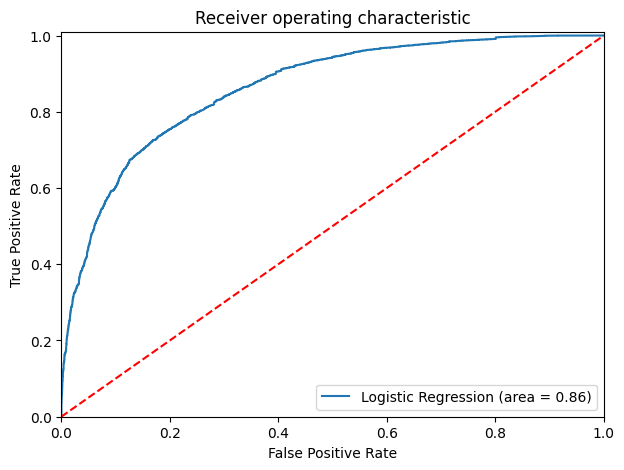

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

#### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3711235647822323


**Checking model performance on training set**

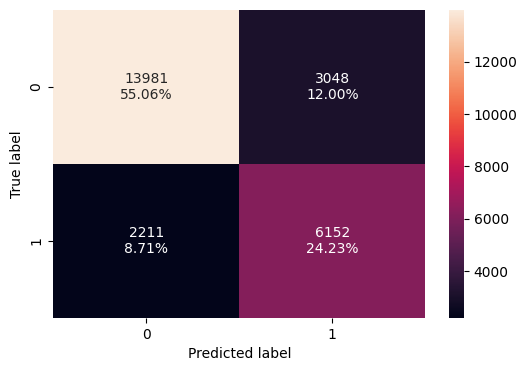

In [ ]:
confusion_matrix_statsmodels(lg1,X_train1,y_train,threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79289 0.73562    0.66870 0.70056

F1 score has improved

**Checking model performance on test set**

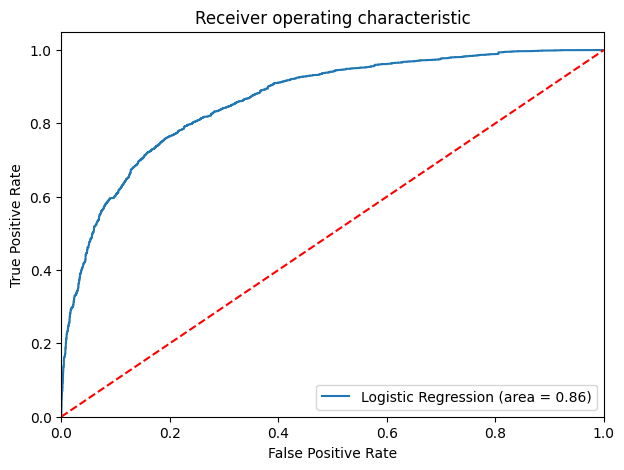

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

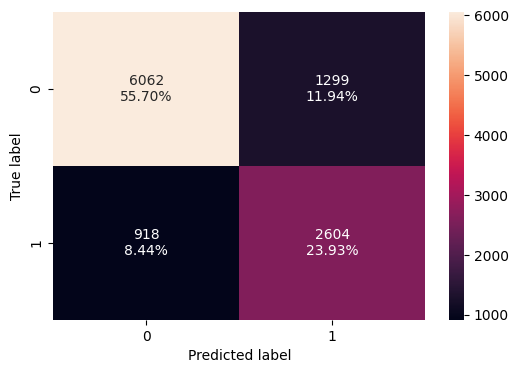

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79629 0.73935    0.66718 0.70141

#### Precision-Recall Curve

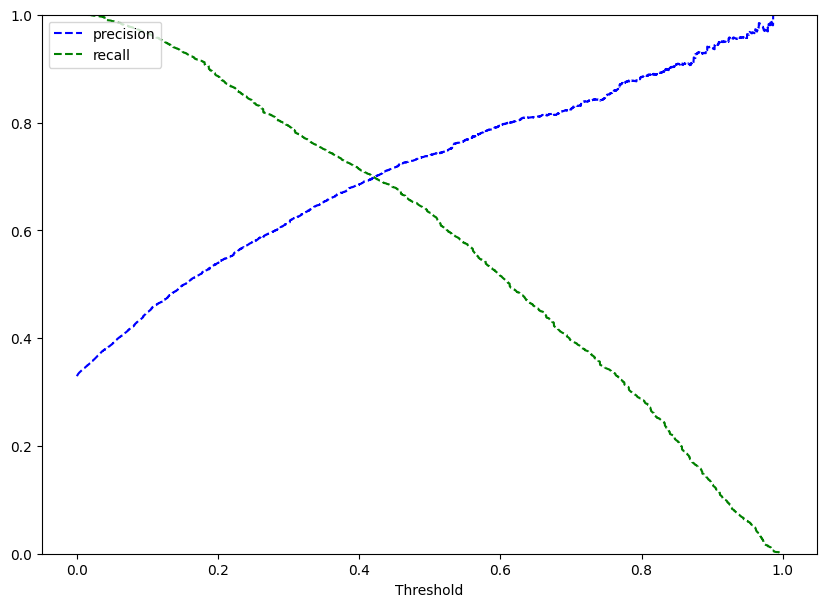

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At around 0.42, we get a threshold value.

In [ ]:
optimal_threshold_recall_precision = 0.42

**Checking model performance on training set**

In [ ]:
confusion_matrix_statsmodels(lg1,X_train1,y_train,threshold=optimal_threshold_recall_precision)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_recall_precision
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80132 0.69963    0.69788 0.69875

The f1 score is little less on this one then the previous method used

**Checking model performance on test set**

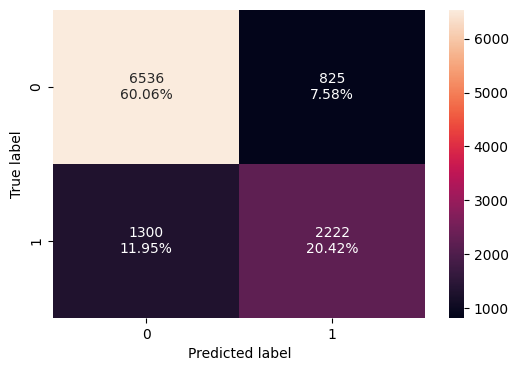

In [ ]:
confusion_matrix_statsmodels(lg1,X_test1,y_test)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_recall_precision
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80355 0.70386    0.69362 0.69870

### Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80549   
Recall                                         0.63279   
Precision                                      0.73911   
F1                                             0.68183   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79289   
Recall                                0.73562   
Precision                             0.66870   
F1                                    0.70056   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80132  
Recall                                0.69963  
Precision                             0.69788  
F1                                    0.69875

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80474   
Recall                                         0.63089   
Precision                                      0.72924   
F1                                             0.67651   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79629   
Recall                                0.73935   
Precision                             0.66718   
F1                                    0.70141   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80355  
Recall                                0.70386  
Precision                             0.69362  
F1                                    0.69870

- Almost all the three models are performing well on both training and test data without the problem of overfitting and underfitting.
- All models have similar f1 scores, but the best one is probably the model with 0.37 threshold. Therefore it can be selected as the final model.


## K- Nearest Neighbour  and Naive Bayes model

### KNN Model Building

In order to optimize our model, it's essential to experiment with different values of k to find the most suitable fit for our data. We can commence this process by setting k equal to 3 and gradually exploring other values to assess their impact on the model's performance.

- We'll only consider odd values of K as the classification will be done based on majority voting.

#### K=3

In [ ]:
# instantiate learning model (k = 3)
knn_3 = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Model Performance Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a booking will not cancel but in reality, the booking will cancel (FN)
- Predicting a booking will cancel but in reality, the booking will not cancel (FP)

**Which case is more important?**

- If we predict that a booking will not cancel but in reality, the booking cancels, then the company will have to face the loss and the hotel cannot resell the room.
- If we predict that a booking will cancel but in reality, the booking does not cancel, then the company will have to bear the cost of guests paid or provide compensation for the visitors.

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

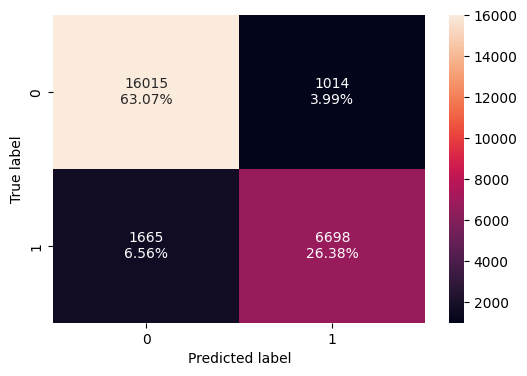

In [ ]:
confusion_matrix_sklearn(knn_3, X_train, y_train)

In [ ]:
#Training Performance
print('Training Performance')

knn_perf_train_3 = model_performance_classification_sklearn(
    knn_3, X_train, y_train
)
knn_perf_train_3

Training Performance


Accuracy  Recall  Precision      F1
0   0.89449 0.80091    0.86852 0.83334

In [ ]:
confusion_matrix_sklearn(knn_3, X_test, y_test)

In [ ]:
#Testing Performance
print('Testing Performance')

knn_perf_test_3 = model_performance_classification_sklearn(
    knn_3, X_test, y_test
)
knn_perf_test_3

Testing Performance


Accuracy  Recall  Precision      F1
0   0.80401 0.65758    0.71415 0.68470

Let's run the KNN with no of neighbours to be 1,3,5..19 and find the optimal number of neighbours from the above list using the recall score

#### K with different values

In [ ]:
# creating odd list of K for KNN
# myList = list(range(2,20))

# subsetting just the odd ones
# neighbors = list(filter(lambda x: x % 2 != 0, myList))

# creating a list of odd values of K for KNN
neighbors = [i for i in range(3,20) if i%2 != 0]

# empty list that will hold recall scores
recall_scores_train = []
recall_scores_test = []

# perform recall metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # predict on train and test
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # evaluate recall on train and test
    scores_train = recall_score(y_train, y_pred_train)
    recall_scores_train.append(scores_train)
    scores_test = recall_score(y_test, y_pred_test)
    recall_scores_test.append(scores_test)

In [ ]:
import matplotlib.pyplot as plt

# Plot recall scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o')
plt.title('KNN Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

- The recall scores for both training and test sets are highest when k=3. This suggests that with k=3, the model is better at identifying positive instances in both the training and test data compared to other values of k.

- As the value of k increases beyond 3, the recall scores tend to decrease for both training and test sets. This indicates a potential risk of the model not being able to identify the underlying patterns in the data.

- Therefore, based on the provided recall scores, k=3 appears to be the most suitable choice for balancing model performance between capturing positive instances effectively and generalizing well to new data.

### Naive Bayes Model Building

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

#### Model Evaluation

Same procedure as in KNN model evaluation

In [ ]:
confusion_matrix_sklearn(nb, X_train, y_train)

In [ ]:
#Training Performance
print('Training Performance')

nb_perf_train = model_performance_classification_sklearn(
    nb, X_train, y_train
)
nb_perf_train

Training Performance


Accuracy  Recall  Precision      F1
0   0.41304 0.96257    0.35555 0.51929

In [ ]:
confusion_matrix_sklearn(nb, X_test, y_test)

In [ ]:
#Testing Performance
print('Testing Performance')

nb_perf_test = model_performance_classification_sklearn(
    nb, X_test, y_test
)
nb_perf_test

Testing Performance


Accuracy  Recall  Precision      F1
0   0.40945 0.96621    0.35043 0.51432

### Comparison of Models and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        knn_perf_train_3.T,
        nb_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "K Nearest Neighbor k=3",
    "Naive Bayes",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


K Nearest Neighbor k=3  Naive Bayes
Accuracy                  0.89449      0.41304
Recall                    0.80091      0.96257
Precision                 0.86852      0.35555
F1                        0.83334      0.51929

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        knn_perf_test_3.T,
        nb_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "K Nearest Neighbor k=3",
    "Naive Bayes",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


K Nearest Neighbor k=3  Naive Bayes
Accuracy                  0.80401      0.40945
Recall                    0.65758      0.96621
Precision                 0.71415      0.35043
F1                        0.68470      0.51432

- In both the training and test sets, the K Nearest Neighbour model with k=3 demonstrates the highest precision and f1 score among all compared models.

- In both the training and test sets, Naive Bayes demonstrates the highest recall among all compared models. This indicates that the Naive Bayes model is better at correctly identifying positive instances compared to the KNN model with different k values.

- K Nearest Neighbour consistently shows lower recall values compared to Naive Bayes model. This suggests that KNN may struggle to capture positive instances as effectively as Naive Bayes model in both training and test datasets, highlighting potential limitations in its performance for this specific task.
- Naive bayes model is best fit to minimize false negative errors and KNN with k=3 is best fit to minimize false positive errors.

## Decision Tree Model

### Model Building

#### Decision Tree (default)

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Model Performance Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a booking will not cancel but in reality, the booking will cancel (FN)
- Predicting a booking will cancel but in reality, the booking will not cancel (FP)

**Which case is more important?**

- If we predict that a booking will not cancel but in reality, the booking cancels, then the company will have to face the loss and the hotel cannot resell the room.
- If we predict that a booking will cancel but in reality, the booking does not cancel, then the company will have to bear the cost of guests paid or provide compensation for the visitors.

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

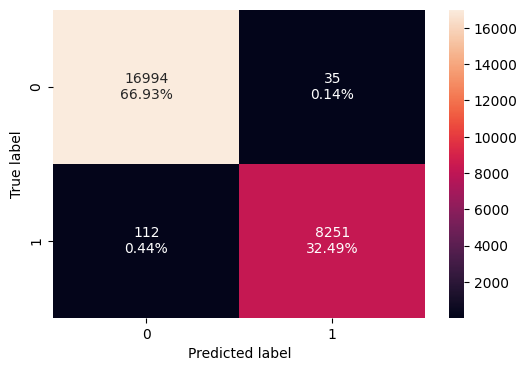

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
#Training Performance
print('Training Performance')

decision_tree_perf_train_without = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train_without

Training Performance


Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

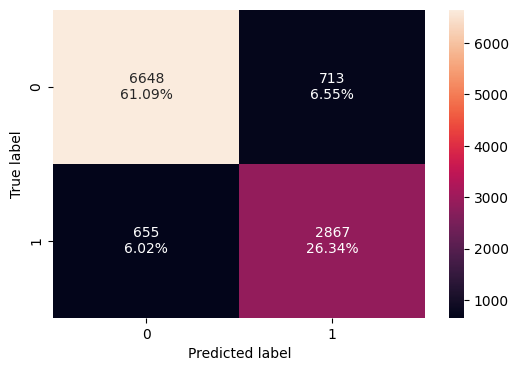

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
#Testing Performance
print('Testing Performance')

decision_tree_perf_test_without = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test_without

Testing Performance


Accuracy  Recall  Precision      F1
0   0.87430 0.81403    0.80084 0.80738

#### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [ ]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

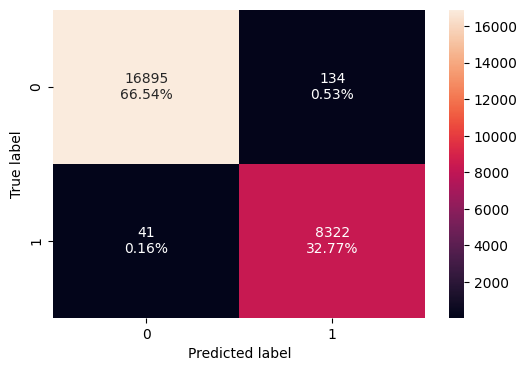

In [ ]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [ ]:
#Training Performance
print('Training Performance')

decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

Training Performance


Accuracy  Recall  Precision      F1
0   0.99311 0.99510    0.98415 0.98960

* Model is able to perfectly classify all the data points on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

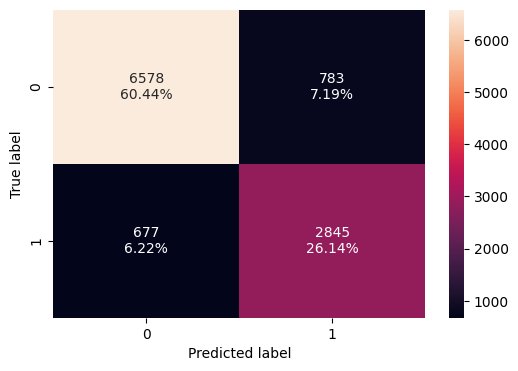

In [ ]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [ ]:
#Testing Performance
print('Testing Performance')

decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

Testing Performance


Accuracy  Recall  Precision      F1
0   0.86585 0.80778    0.78418 0.79580

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfitting.

**Let's use pruning techniques to try and reduce overfitting.**

#### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

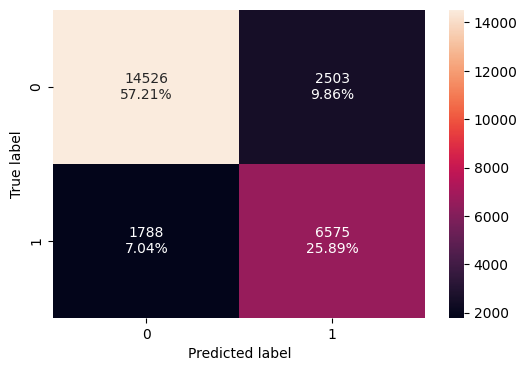

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
#Training Performance
print('Training Performance')

decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Training Performance


Accuracy  Recall  Precision      F1
0   0.83101 0.78620    0.72428 0.75397

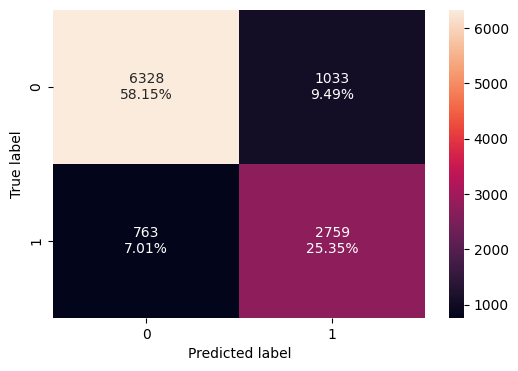

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
#Testing Performance
print('Testing Performance')

decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Testing Performance


Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

In [ ]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

In [ ]:
importances = estimator.feature_importances_
importances

array([0.        , 0.02691882, 0.        , 0.02058904, 0.00699927,
       0.01410054, 0.47554582, 0.        , 0.01412465, 0.00076035,
       0.        , 0.        , 0.        , 0.07623326, 0.16917567,
       0.        , 0.        , 0.00094952, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0100065 , 0.18459655])

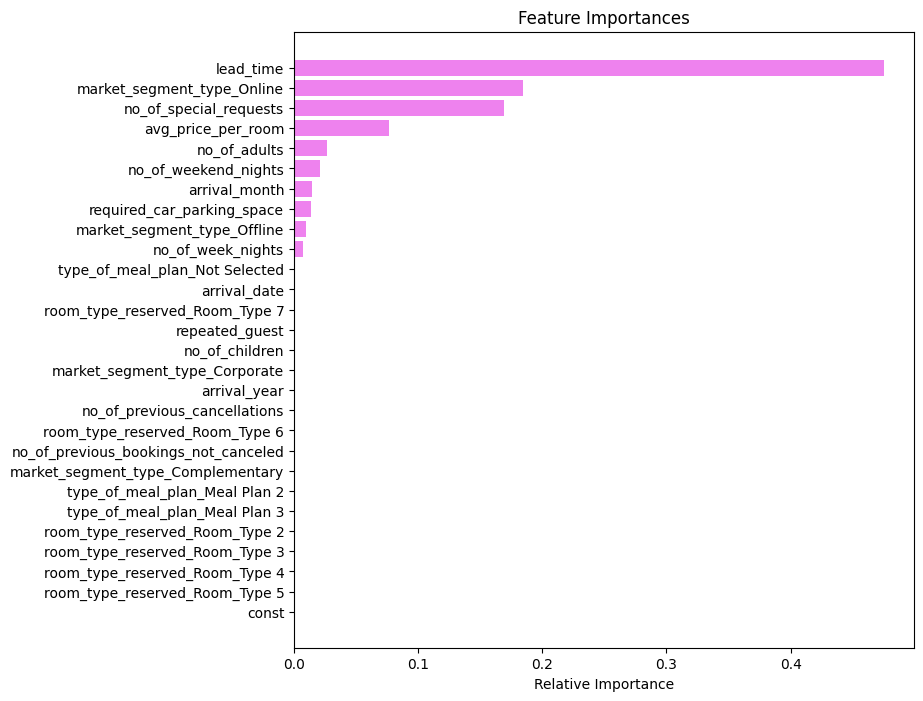

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Decision Tree (Post pruning)

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1       -0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1834     0.00890     0.32806
1835     0.00980     0.33786
1836     0.01272     0.35058
1837     0.03412     0.41882
1838     0.08118     0.50000

[1839 rows x 2 columns]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

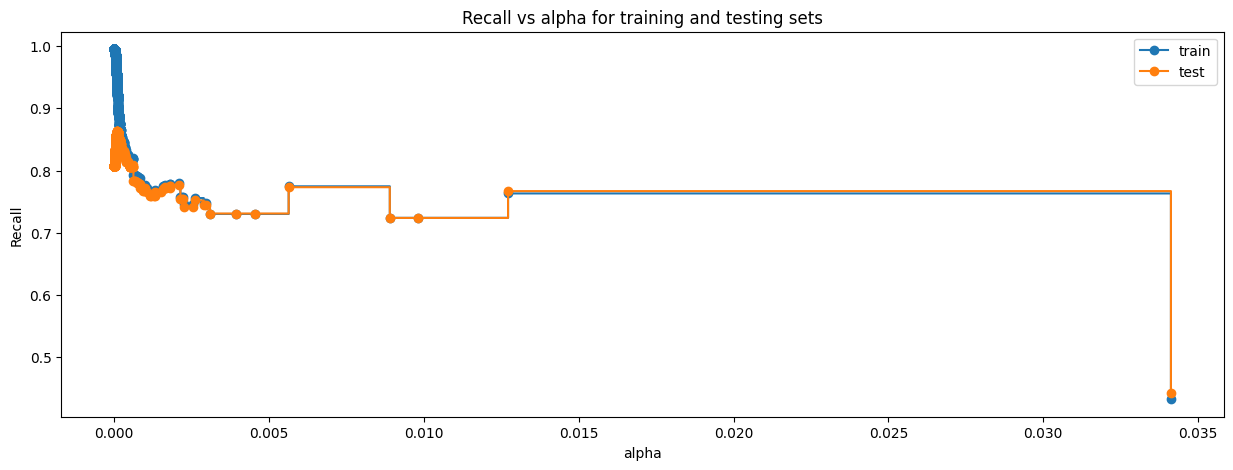

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=8.046650001478846e-05, class_weight='balanced',
                       random_state=1)


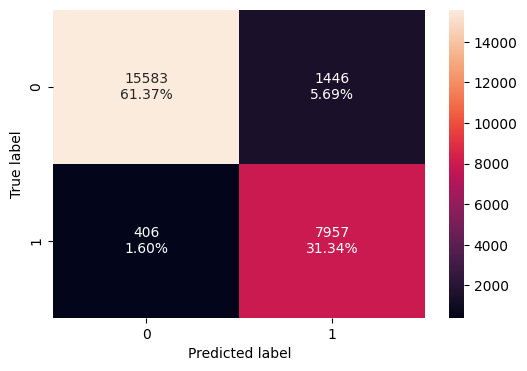

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
#Training Performance
print('Training Performance')

decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Training Performance


Accuracy  Recall  Precision      F1
0   0.92706 0.95145    0.84622 0.89576

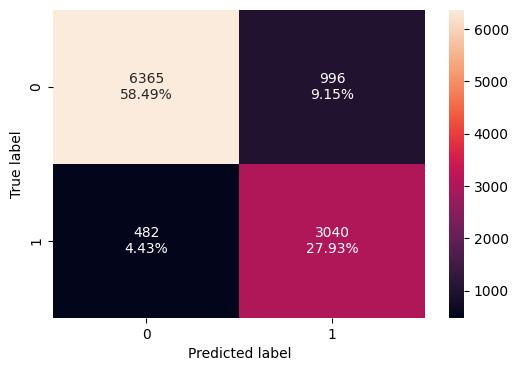

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
#Testing Performance
print('Testing Performance')

decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Testing Performance


Accuracy  Recall  Precision      F1
0   0.86419 0.86315    0.75322 0.80445

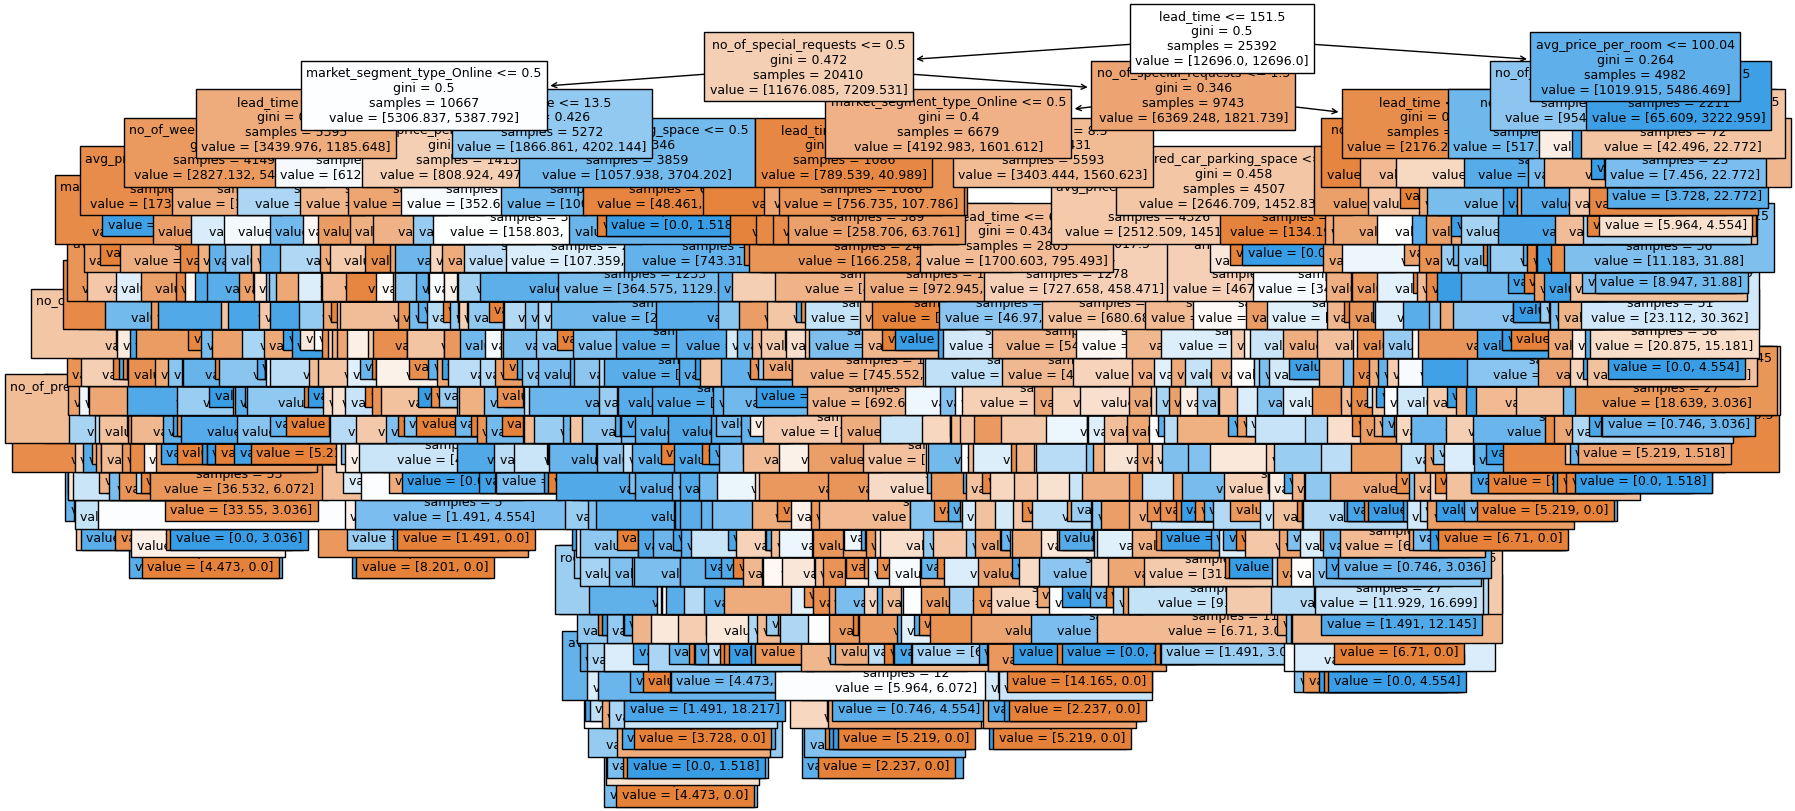

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

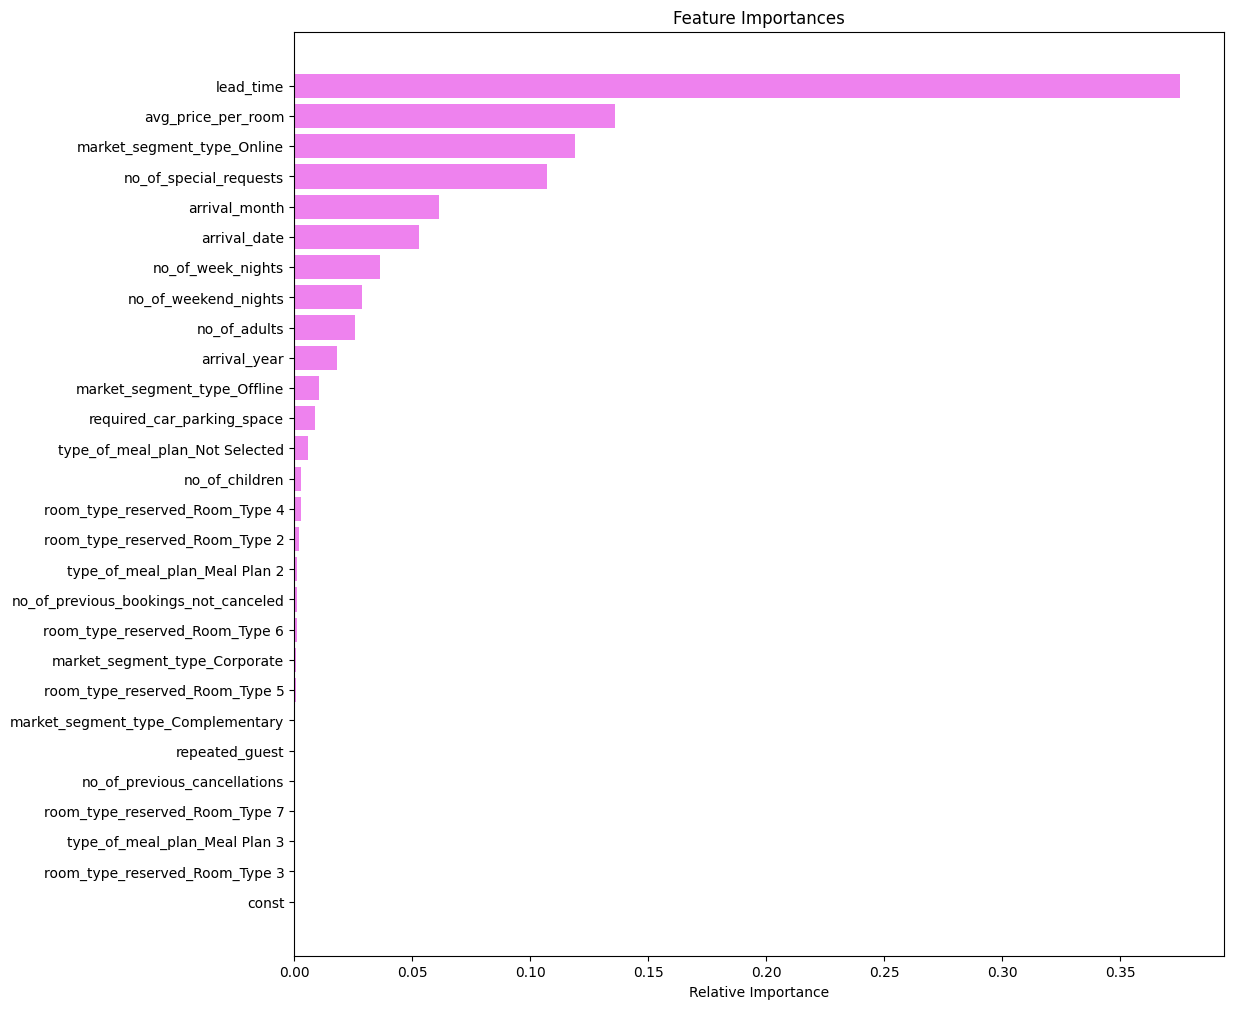

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparison of Models and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.99421   
Recall                                0.98661   
Precision                             0.99578   
F1                                    0.99117   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.99311                      0.83101   
Recall                             0.99510                      0.78620   
Precision                          0.98415                      0.72428   
F1                                 0.98960                      0.75397   

           Decision Tree (Post-Pruning)  
Accuracy                        0.92706  
Recall                          0.95145  
Precision                       0.84622  
F1                              0.89576

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.87430   
Recall                                0.81403   
Precision                             0.80084   
F1                                    0.80738   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.86585                      0.83497   
Recall                             0.80778                      0.78336   
Precision                          0.78418                      0.72758   
F1                                 0.79580                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86419  
Recall                          0.86315  
Precision                       0.75322  
F1                              0.80445

* Decision tree models with pre-pruning and post-pruning both are giving equally high recall scores on both training and test sets.
* However, we will choose the post pruned tree as the best model since it is giving a slightly high precision score on the train and test sets than the pre-pruned tree.

## Actionable Insights & Recommendations

### Actionable Insights

-	Our predictions from the models show that guests booking cheaper rooms, with shorter lead times, requiring a parking space, being a repeat guest, with higher number of special requests, from the Corporate and Offline market segments are less likely to cancel bookings. Conversely, guests booking more expensive rooms, with longer lead times, through the Online market segment are more likely to cancel bookings.
-	Based on the coefficients in the logistic regression models and the features in the decision-tree models, both prediction models provide evidence that INN Hotels should at least consider separate cancellation and refund policies for its guests travelling for business or personal reasons.
-	Therefore, the data suggests that introducing a rewards program for business travellers (e.g., requiring more frequent trips, booking on short notice from a corporate sales channel, and directed by corporate travel guidelines to book a room with the lowest available cost) should further incentive these guests to book at INN Hotels and follow-through on their travel plans.
-	Additionally, in case a hotel is at capacity or overbooked, management could utilize the model to ensure all repeat guests or guests travelling for business reasons have rooms available. Conversely, management can combine predictions from both models to identify the "most likely case" that a booking will be cancelled and reallocate that room to a booking for that room category which is the "least likely case".
-	We offer a disclaimer that this model should not replace the industry experience of its management team regarding managing its hotel's capacity. Rather, these models can provide supplemental evidence in support of its decision-making process.
-	To further improve the utility of the models, the hotel can provide approximations of the costs related to the outcomes corresponding to true/false positives/negatives. Our team can then optimize the model predictions to achieve the highest expected profits, versus optimizing for F1 score, which we chose for our evaluation criteria based on the client's use-case.

### Recommendations

-	Offer best room rates before 5 months ahead. After that we may be able to increase your prices slightly and increase profit.
-	Require a non-refundable deposit on all rooms in advance of over 5 months.
-	Replace the ‘Full Board’ option on booking with a menu of special requests available, instead of waiting for them to come in sell them even if they are no charge, room upgrades, Wi-Fi, laundry bag, slippers can we provided with the room keys.
-	Promote our hotel facilities through Ads and marketing campaign. Conduct special events for the guests and provide gifts for the winners, so that customers can visit our hotel again.
-	Target on children with some play areas, swimming pool, complementary sweets and other goodies to attract children coming with their parents.